---
# Programming for Data Science
## The place to be at, right now!
## Project
---
### NOVA IMS
### 2019/2020
---
> Tourism is one of the main contributors for global economy, inducing dynamic transformations all around the globe, and being of high appeal to investors. Nevertheless, every investment requires valuables insights that support and justify said investment.
---
> This report focuses on retrieving such insights from existing public data to better support business decisions regarding turism investment.
---
#### Group Members:
    André Queda (R2016658)
    Manuel Viegas (R2016674)
    Miguel Cordeiro (R2016702)
    Sofia Cunha (M20190795)
---
This report is publicly available at https://github.com/foiTiroEQueda/programmingForDS_NOVAIMS


#### First things first: 
- Install World Bank API: In order to facilitate data import, we used an external api. To install it, open the Aconda Prompt and write "pip install world_bank_data" in the command line.
- Download the file "cores" and store it in your Jupyter Notebook working directory
- Install Plotly: To install it, open the Aconda Prompt and write "pip install plotly" in the command line.

---
---

## 1. Introduction
The World Bank Group is one of the world’s largest sources of funding and knowledge for developing countries. Its five institutions share a commitment to reducing poverty, increasing shared prosperity, and promoting sustainable development.
The World Bank provides a free and publicly available vast set of data regarding different indicators, describing each country, through their open data platform: https://data.worldbank.org/ 

Tourism doesn't reside exclusively on natural conditions, being of high importance to understand social phenomena linked to each country and the main aspects that affect tourism.
This understanding can be done with the analysis of existing data, being more complete with a larger variety of data analysed. Despite that, free and publicly available data is scarce, which limits the analysis performed in this report.
Concerning the data obtained, this report focuses on retrieving insights from existing public data to better support business decisions regarding turism investment, doing so by processing the data, analyzing correlations between different variables and producing meaningful visualizations.

## 2. Getting everything ready to start

### 2.1 Import Packages

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import world_bank_data as wb
import numpy as np
import seaborn as sb
import matplotlib
import pandas.io.formats.style
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.vq import kmeans, kmeans2
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
%matplotlib notebook
%matplotlib notebook
#pd.set_option('display.max_rows', 14) ##quantaslinhas consegues ver se fizeres print()
#pd.set_option('display.max_columns', 14)
from matplotlib import animation
import matplotlib.animation as animation
import matplotlib.ticker as ticker
from IPython.display import display, HTML
%config InlineBackend.figure_format='retina'
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

### 2.2 Import Variables
The variables “Ease of doing business”, “Depth of credit information index” and “Business extent of disclosure index” allow to evaluate how business is conducted in each country, in terms of ease and transparency.
“Total tax and contribution rate” and “Time to prepare and pay taxes” are measures of the fiscal charge of the countries. 
“GDP” (Gross Domestic Product) and “Inflation” can be seen as way to measure economy and wealth of each country.
“Travel services”, “Employment in services”, “Number of arrivals” and “Receipts” are the variables more closely associated with Tourism, each one in a different way. They were chosen because Tourism is the subject of the analysis.
“Total population” and “Land area” were used to calculate the population density. This could be useful for evaluating if a country is saturated.
“Intentional Homicides” and “CPIA transparency, accountability and corruption” were used as proxies to the level of crime in each country.

In [3]:
bus_ease=wb.get_series('IC.BUS.EASE.XQ', id_or_value='id', simplify_index=True)
crd_info=wb.get_series('IC.CRD.INFO.XQ', id_or_value='id', simplify_index=True)
bus_disc=wb.get_series('IC.BUS.DISC.XQ', id_or_value='id', simplify_index=True)
tax_totl=wb.get_series('IC.TAX.TOTL.CP.ZS', id_or_value='id', simplify_index=True)
tax_durs=wb.get_series('IC.TAX.DURS', id_or_value='id', simplify_index=True)
tx_val_trvl=wb.get_series('TX.VAL.TRVL.ZS.WT', id_or_value='id', simplify_index=True)
sl_srv_empl=wb.get_series('SL.SRV.EMPL.ZS', id_or_value='id', simplify_index=True)
gdp=wb.get_series('NY.GDP.MKTP.CD', id_or_value='id', simplify_index=True)
pop_totl=wb.get_series('SP.POP.TOTL', id_or_value='id', simplify_index=True)
land_area=wb.get_series('AG.LND.TOTL.K2', id_or_value='id', simplify_index=True)
number_arrivals=wb.get_series('ST.INT.ARVL', id_or_value='id', simplify_index=True)
receipts=wb.get_series('ST.INT.RCPT.CD', id_or_value='id', simplify_index=True)
int_homicides=wb.get_series('VC.IHR.PSRC.P5', id_or_value='id', simplify_index=True)
trns_acc_corrup=wb.get_series('IQ.CPA.TRAN.XQ', id_or_value='id', simplify_index=True)
annual_infl=wb.get_series('FP.CPI.TOTL.ZG', id_or_value='id', simplify_index=True)

In [4]:
country_names=wb.get_countries()
country_names=country_names[['name','region']].reset_index().rename(columns={'id': 'Country'})

### 2.3 Variables considered

| Variable  | Measurement  | Brief Description  | Brief Explanation  |
|:---:|:---:|:---:|:---:|
| bus_ease         |   Open scale, starting from 1 - most business friendly      | Ease of doing business   | Measures regulations directly affecting businesses and does not directly measure more general conditions  |
|  crd_info        |    0-low to 8-high      | Depth of credit information index   | Measures rules affecting the scope, accessibility, and quality of credit information available through public or private credit registries  |
|  bus_disc        |     0=less disclosure to 10=more disclosure     | Business extent of disclosure index   | Measures the extent to which investors are protected through disclosure of ownership and financial information  |
| tax_totl         |    % of profit      | Total tax and contribution rate   | Measures the amount of taxes and mandatory contributions payable by businesses after accounting for allowable deductions and exemption as a share of commercial profits  |
| tax_durs         |    Hours      | Time to prepare and pay taxes   | Time, in hours per year, it takes to prepare, file, and pay (or withhold) three major types of taxes: the corporate income tax, the value added or sales tax, and labor taxes, including payroll taxes and social security contributions  |
| tx_val_trvl      |    % of commercial service exports      | Travel services   | Measures the percentage of commercial service exports that are related to travel services  |
| sl_srv_empl      |    % of total employment      | Employment in services (modeled ILO estimate)  |  Employment in services relative to total employment |
| gdp              |    Current USD      | Gross Domestic Product   | Monetary value of all finished goods and services made within a country during a specific period. Provides an economic snapshot of a country, used to estimate the size of an economy and growth rate  |
| pop_totl         |    Total      |  Total population        |     Measures total population     |   |   |
| land_area        |   Square km       |  Land area        |  Measures total land area |   |
| number_arrivals  |    Total      | International tourism, number of arrivals  |  Measures the number of arrivals related with tourism |
| receipts         |    Current USD      | International tourism, receipts   | Covers goods and services acquired from an economy by travelers in that economy for their own use during visits of less than one year for business or personal purposes. |
| int_homicides         |    Total per 100000 people      | Intentional Homicides   | Number of intentional homicides per 100000 people |
| trns_acc_corrup         |    1=low to 6=high     | CPIA transparency, accountability, and corruption in the public sector rating   | The three main dimensions assessed are the accountability of the executive to oversight institutions and of public employees for their performance, access of civil society to information on public affairs, and state capture by narrow vested interests |
|   annual_infl       | Annual %        | Inflation, consumer prices   | Reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services |

## 3. Data Treatment/Pre-Processing

### 3.1 Building a single dataset

In [5]:
final=pd.DataFrame(dict(bus_ease=bus_ease, crd_info=crd_info, bus_disc=bus_disc, tax_totl=tax_totl, tax_durs=tax_durs,
                        tx_val_trvl=tx_val_trvl, sl_srv_empl=sl_srv_empl, gdp=gdp, pop_totl=pop_totl, land_area=land_area,
                        number_arrivals=number_arrivals, receipts=receipts, int_homicides=int_homicides,trns_acc_corrup=trns_acc_corrup, 
                        annual_infl=annual_infl)).reset_index()
final=final.merge(country_names, on = 'Country')
final.tail()

Country  Year  bus_ease  crd_info  bus_disc  tax_totl  tax_durs  \
15835     ZWE  2015       NaN       5.0       8.0      31.6     242.0   
15836     ZWE  2016       NaN       5.0       8.0      31.6     242.0   
15837     ZWE  2017       NaN       4.0       8.0      31.6     242.0   
15838     ZWE  2018       NaN       6.0       8.0      31.6     242.0   
15839     ZWE  2019     140.0       7.0       8.0      31.6     242.0   

       tx_val_trvl  sl_srv_empl           gdp    pop_totl  land_area  \
15835    51.302909    25.589001  1.996312e+10  13814629.0   386850.0   
15836    50.855094    25.590000  2.054868e+10  14030390.0   386850.0   
15837    40.178038    25.673000  2.281301e+10  14236745.0   386850.0   
15838          NaN    25.580999  3.100052e+10  14439018.0   386850.0   
15839          NaN    25.462000           NaN         NaN        NaN   

       number_arrivals     receipts  int_homicides  trns_acc_corrup  \
15835        2057000.0  191000000.0            NaN              2.0   
15836        2168000.0  194000000.0            NaN              2.0   
15837        2423000.0  158000000.0            NaN              2.0   
15838              NaN          NaN            NaN              2.5   
15839              NaN          NaN            NaN              NaN   

       annual_infl      name               region  
15835    -2.409500  Zimbabwe  Sub-Saharan Africa   
15836    -1.566413  Zimbabwe  Sub-Saharan Africa   
15837     0.909733  Zimbabwe  Sub-Saharan Africa   
15838          NaN  Zimbabwe  Sub-Saharan Africa   
15839          NaN  Zimbabwe  Sub-Saharan Africa

### 3.2 Manipulate Variables
For the analysis, it is best to consider GDP Per Capita and Population Density instead of GDP and Population in absolute values

In [6]:
final['gdp_perCap'] = final['gdp']/final['pop_totl']
final['pop_dens'] = final['pop_totl']/final['land_area']

final = final.drop(['gdp','pop_totl','land_area'], axis=1)
final.head()

Country  Year  bus_ease  crd_info  bus_disc  tax_totl  tax_durs  \
0     ARB  1960       NaN       NaN       NaN       NaN       NaN   
1     ARB  1961       NaN       NaN       NaN       NaN       NaN   
2     ARB  1962       NaN       NaN       NaN       NaN       NaN   
3     ARB  1963       NaN       NaN       NaN       NaN       NaN   
4     ARB  1964       NaN       NaN       NaN       NaN       NaN   

   tx_val_trvl  sl_srv_empl  number_arrivals  receipts  int_homicides  \
0          NaN          NaN              NaN       NaN            NaN   
1          NaN          NaN              NaN       NaN            NaN   
2          NaN          NaN              NaN       NaN            NaN   
3          NaN          NaN              NaN       NaN            NaN   
4          NaN          NaN              NaN       NaN            NaN   

   trns_acc_corrup  annual_infl        name      region  gdp_perCap  pop_dens  
0              NaN          NaN  Arab World  Aggregates         NaN       NaN  
1              NaN          NaN  Arab World  Aggregates         NaN  8.430860  
2              NaN          NaN  Arab World  Aggregates         NaN  8.663154  
3              NaN          NaN  Arab World  Aggregates         NaN  8.903441  
4              NaN          NaN  Arab World  Aggregates         NaN  9.152526

### 3.3 Remove non-country observations

In [7]:
cnames = final['Country'].drop_duplicates()

In [8]:
final=final.loc[~final['Country'].isin(cnames[:47])].reset_index().drop('index', axis=1)
final.tail()

Country  Year  bus_ease  crd_info  bus_disc  tax_totl  tax_durs  \
13015     ZWE  2015       NaN       5.0       8.0      31.6     242.0   
13016     ZWE  2016       NaN       5.0       8.0      31.6     242.0   
13017     ZWE  2017       NaN       4.0       8.0      31.6     242.0   
13018     ZWE  2018       NaN       6.0       8.0      31.6     242.0   
13019     ZWE  2019     140.0       7.0       8.0      31.6     242.0   

       tx_val_trvl  sl_srv_empl  number_arrivals     receipts  int_homicides  \
13015    51.302909    25.589001        2057000.0  191000000.0            NaN   
13016    50.855094    25.590000        2168000.0  194000000.0            NaN   
13017    40.178038    25.673000        2423000.0  158000000.0            NaN   
13018          NaN    25.580999              NaN          NaN            NaN   
13019          NaN    25.462000              NaN          NaN            NaN   

       trns_acc_corrup  annual_infl      name               region  \
13015              2.0    -2.409500  Zimbabwe  Sub-Saharan Africa    
13016              2.0    -1.566413  Zimbabwe  Sub-Saharan Africa    
13017              2.0     0.909733  Zimbabwe  Sub-Saharan Africa    
13018              2.5          NaN  Zimbabwe  Sub-Saharan Africa    
13019              NaN          NaN  Zimbabwe  Sub-Saharan Africa    

        gdp_perCap   pop_dens  
13015  1445.071062  35.710557  
13016  1464.583529  36.268295  
13017  1602.403507  36.801719  
13018  2146.996385  37.324591  
13019          NaN        NaN

### 3.4 Assess and remove missing values
As a first measure for treating missing values, it is necessary to assess them,
- Starting by year: there are years that have a high percentage of missing values, transversal to the majority of variables
- Followed by variable: some variables have a high percentage of missing values, even when excluded the years with the most missing values, which make then unusable in the analysis, despite being relevant in theory
- And finally by country: some countries don't provide enough information, even when only considering the years and variables with acceptable percentage of missing values

#### 3.4.1 Assess percentage of missing values in each year

In [9]:
perc_years = final.groupby(['Year']).count()
perc_years = perc_years.drop(['Country', 'name', 'region'], axis=1)

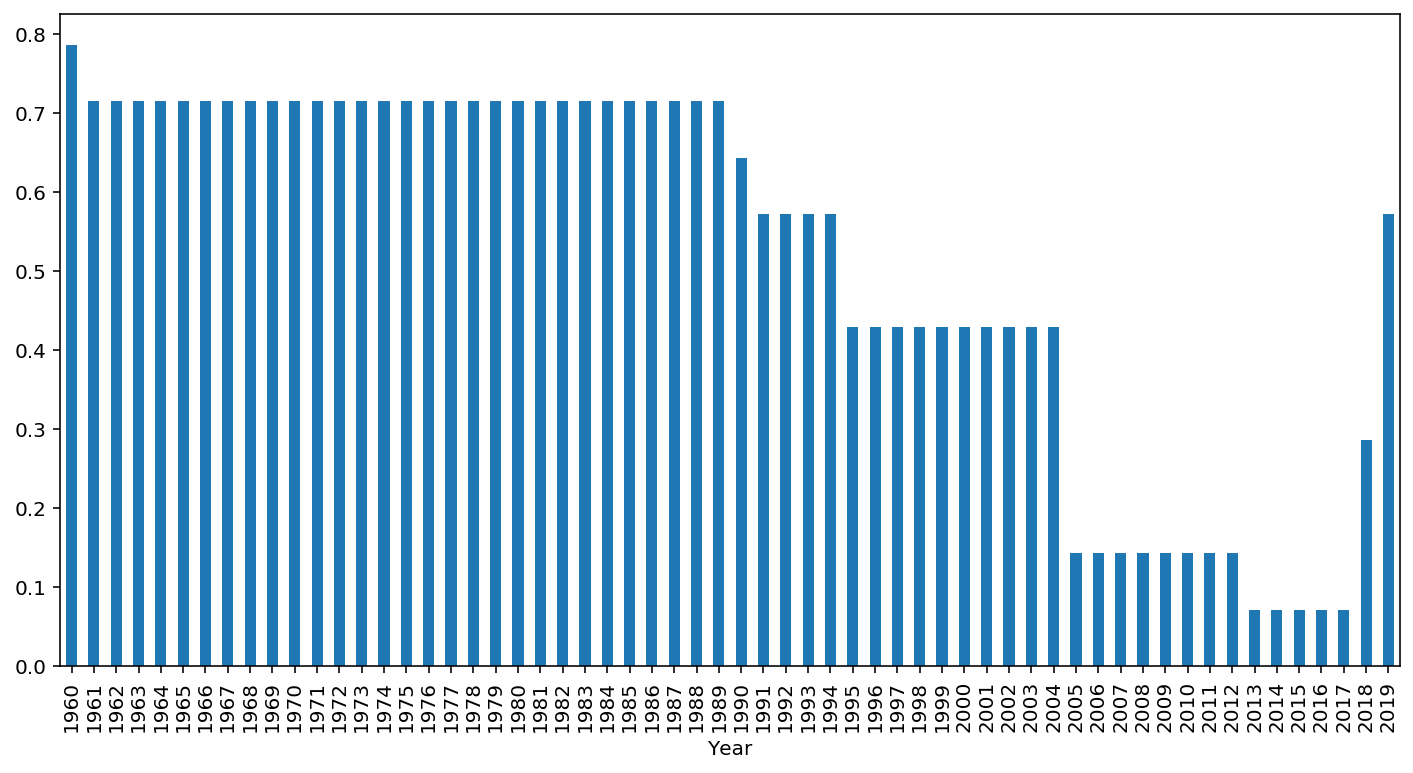

In [10]:
perc_years['Percent'] = perc_years.apply( lambda s : s.value_counts().get(0,0), axis=1)/(len(perc_years.columns))
perc_years['Percent'].plot(kind='bar', stacked=True, figsize=(12,6))

#### 3.4.2 Remove years with more than 50% of missing values

In [11]:
years_miss50 = perc_years.loc[perc_years['Percent']>0.49].reset_index()

In [12]:
years_miss50 = years_miss50['Year']

In [13]:
final=final.loc[~final['Year'].isin(years_miss50)]
final.head()

Country  Year  bus_ease  crd_info  bus_disc  tax_totl  tax_durs  \
35     AFG  1995       NaN       NaN       NaN       NaN       NaN   
36     AFG  1996       NaN       NaN       NaN       NaN       NaN   
37     AFG  1997       NaN       NaN       NaN       NaN       NaN   
38     AFG  1998       NaN       NaN       NaN       NaN       NaN   
39     AFG  1999       NaN       NaN       NaN       NaN       NaN   

    tx_val_trvl  sl_srv_empl  number_arrivals  receipts  int_homicides  \
35          NaN    26.299000              NaN       NaN            NaN   
36          NaN    25.580000              NaN       NaN            NaN   
37          NaN    24.917999              NaN       NaN            NaN   
38          NaN    24.309999              NaN       NaN            NaN   
39          NaN    23.653999              NaN       NaN            NaN   

    trns_acc_corrup  annual_infl         name      region  gdp_perCap  \
35              NaN          NaN  Afghanistan  South Asia         NaN   
36              NaN          NaN  Afghanistan  South Asia         NaN   
37              NaN          NaN  Afghanistan  South Asia         NaN   
38              NaN          NaN  Afghanistan  South Asia         NaN   
39              NaN          NaN  Afghanistan  South Asia         NaN   

     pop_dens  
35  27.740491  
36  28.878224  
37  29.649735  
38  30.232768  
39  30.896125

#### 3.4.3 Assess percentage of missing values in each variable

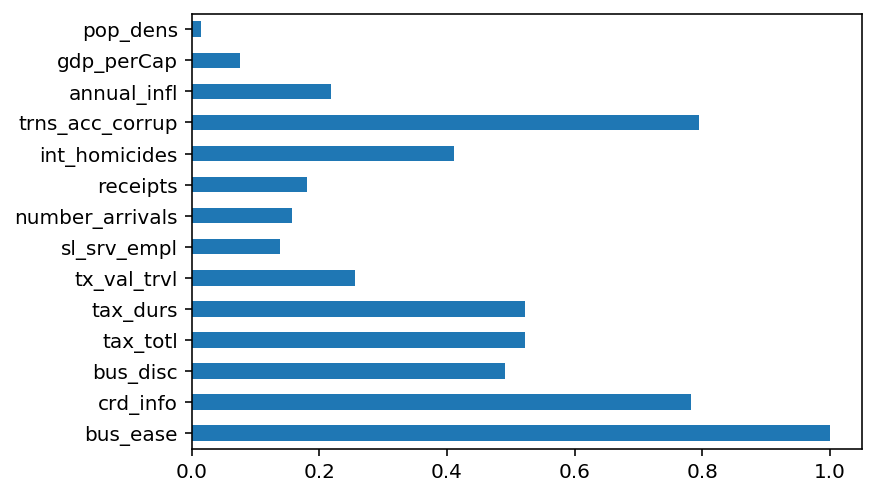

In [14]:
perc_var = final.isnull().sum() / len(final)
perc_var.drop(['Country', 'Year', 'name', 'region']).plot(kind='barh', stacked=True)

#### 3.4.4 Find variables with more than 60% of missing values

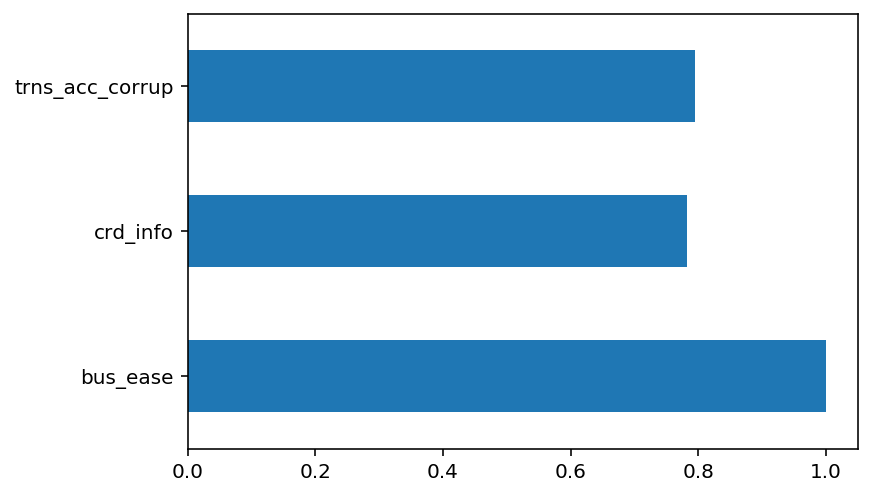

In [15]:
perc_var.loc[perc_var>0.60].plot(kind='barh', stacked=True)
var_over_60_mv = perc_var.loc[perc_var>0.60]

#### 3.4.5 Remove variables with more than 60% of missing values

In [16]:
final = final.drop(var_over_60_mv.index.values, axis=1)
final

Country  Year  bus_disc  tax_totl  tax_durs  tx_val_trvl  sl_srv_empl  \
35        AFG  1995       NaN       NaN       NaN          NaN    26.299000   
36        AFG  1996       NaN       NaN       NaN          NaN    25.580000   
37        AFG  1997       NaN       NaN       NaN          NaN    24.917999   
38        AFG  1998       NaN       NaN       NaN          NaN    24.309999   
39        AFG  1999       NaN       NaN       NaN          NaN    23.653999   
40        AFG  2000       NaN       NaN       NaN          NaN    22.899000   
41        AFG  2001       NaN       NaN       NaN          NaN    22.250000   
42        AFG  2002       NaN       NaN       NaN          NaN    26.327999   
43        AFG  2003       NaN       NaN       NaN          NaN    26.864000   
44        AFG  2004       NaN       NaN       NaN          NaN    26.750000   
45        AFG  2005       1.0      35.8     275.0          NaN    26.827000   
46        AFG  2006       1.0      35.8     275.0          NaN    26.861000   
47        AFG  2007       1.0      35.8     275.0          NaN    27.652000   
48        AFG  2008       1.0      35.8     275.0     1.350831    28.228001   
49        AFG  2009       1.0      35.8     275.0     2.194115    32.216000   
50        AFG  2010       1.0      35.8     275.0     3.643453    36.113998   
51        AFG  2011       1.0      35.8     275.0     3.380105    39.665001   
52        AFG  2012       1.0      35.8     275.0     5.796043    43.965000   
53        AFG  2013       1.0      35.6     275.0    17.207946    44.153000   
54        AFG  2014       1.0      36.1     275.0     8.745831    43.897999   
55        AFG  2015       1.0      36.1     275.0    10.804126    43.674999   
56        AFG  2016       1.0      47.9     275.0    12.801127    43.756001   
57        AFG  2017       1.0      71.4     275.0     0.636958    43.768002   
58        AFG  2018       8.0      71.4     270.0          NaN    43.816002   
95        ALB  1995       NaN       NaN       NaN    69.329073    34.890999   
96        ALB  1996       NaN       NaN       NaN    62.540717    35.137001   
97        ALB  1997       NaN       NaN       NaN  -841.614907    35.257999   
98        ALB  1998       NaN       NaN       NaN   165.093472    35.473999   
99        ALB  1999       NaN       NaN       NaN    74.928977    35.722000   
100       ALB  2000       NaN       NaN       NaN    88.439700    35.937000   
...       ...   ...       ...       ...       ...          ...          ...   
12953     ZMB  2013       4.0      15.9     183.0    72.756503    34.201000   
12954     ZMB  2014       4.0      15.5     177.0    75.398695    34.471001   
12955     ZMB  2015       4.0      18.6     191.0    76.626541    34.849998   
12956     ZMB  2016       4.0      18.6     185.5    77.120072    34.959999   
12957     ZMB  2017       4.0      15.6     158.0    75.444767    35.173000   
12958     ZMB  2018       4.0      15.6     158.0    77.857990    35.401001   
12995     ZWE  1995       NaN       NaN       NaN          NaN    27.795000   
12996     ZWE  1996       NaN       NaN       NaN          NaN    27.816999   
12997     ZWE  1997       NaN       NaN       NaN          NaN    28.105000   
12998     ZWE  1998       NaN       NaN       NaN          NaN    28.601999   
12999     ZWE  1999       NaN       NaN       NaN          NaN    28.139999   
13000     ZWE  2000       NaN       NaN       NaN          NaN    28.091999   
13001     ZWE  2001       NaN       NaN       NaN          NaN    27.372999   
13002     ZWE  2002       NaN       NaN       NaN          NaN    26.921000   
13003     ZWE  2003       NaN       NaN       NaN          NaN    25.788000   
13004     ZWE  2004       NaN       NaN       NaN          NaN    25.783001   
13005     ZWE  2005       8.0      30.1     216.0          NaN    24.069000   
13006     ZWE  2006       8.0      30.2     216.0          NaN    20.958000   
13007     ZWE  2007       8.0      49.3     256.0       

#### 3.4.6 Assess percentage of missing values in each country

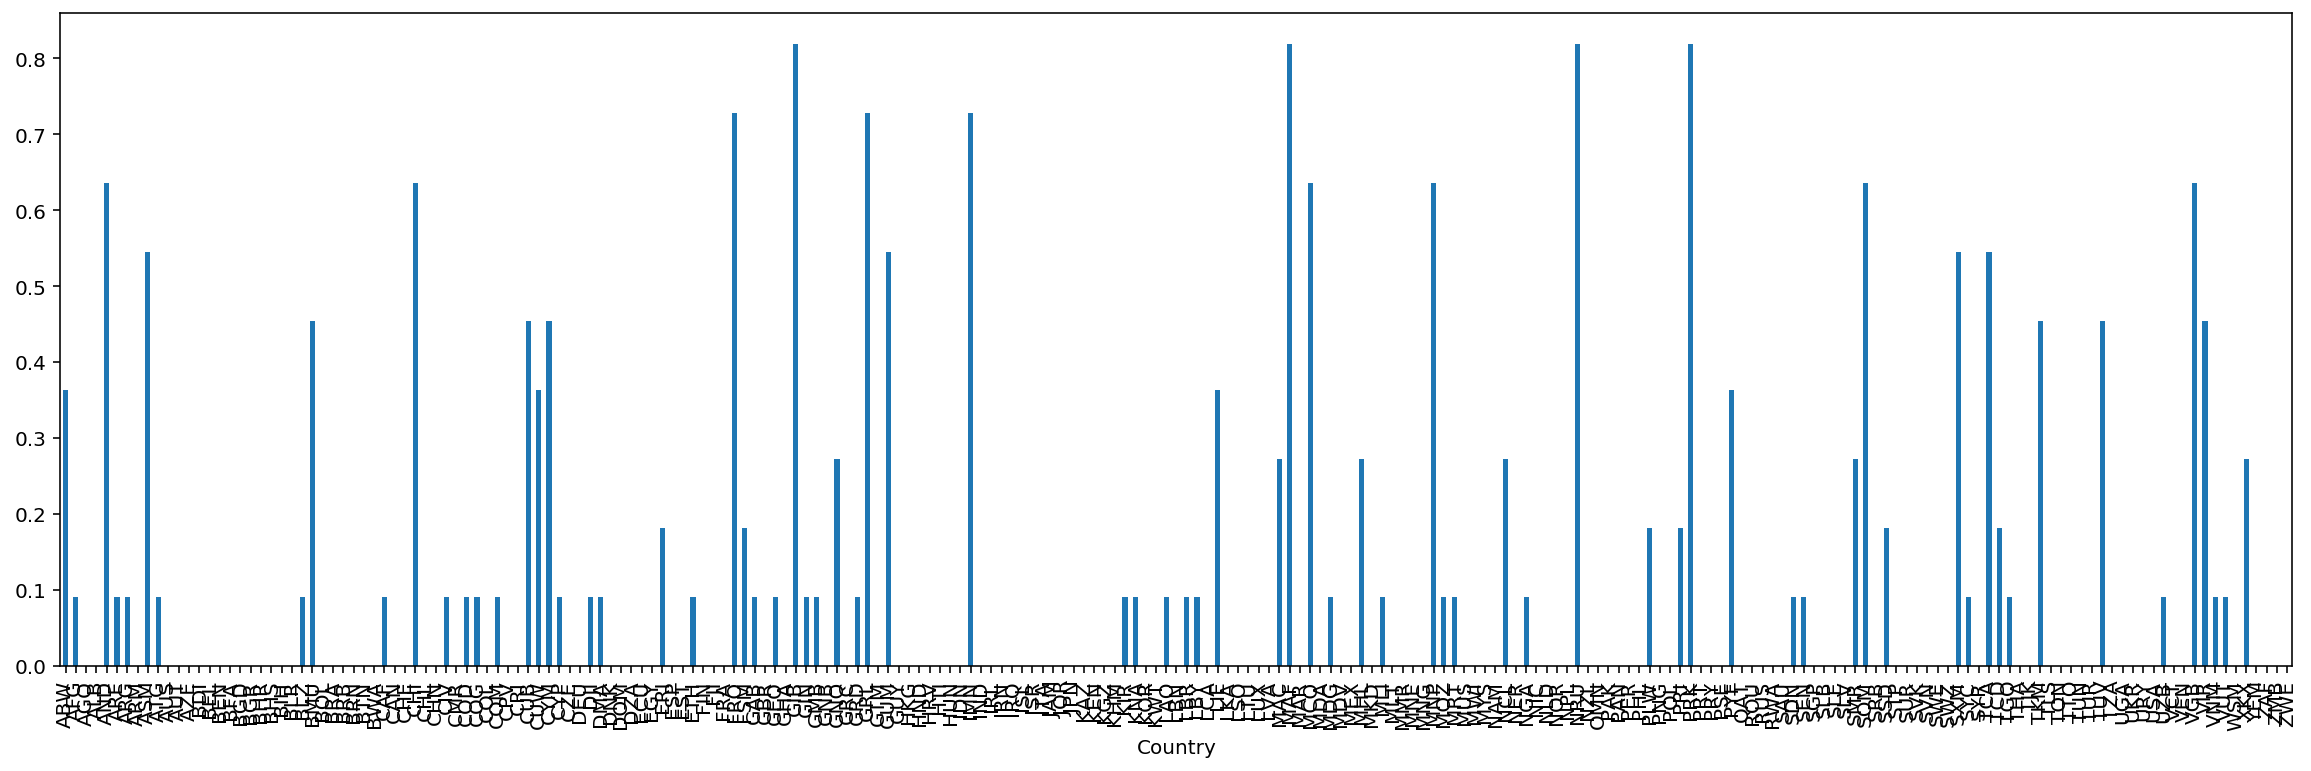

In [17]:
perc_country = final.groupby(['Country']).count()
perc_country = perc_country.drop(['Year', 'name', 'region'], axis=1)
perc_country['Percent'] = perc_country.apply( lambda s : s.value_counts().get(0,0), axis=1)/(len(perc_country.columns))
perc_country['Percent'].plot(kind='bar', stacked=True, figsize=(20,6))

#### 3.4.7 Find countries with more than 30% of missing values

In [18]:
countries_30_mv = final.loc[final['Country'].isin(perc_country.loc[perc_country['Percent']>0.3].index), 'name'].drop_duplicates()
countries_30_mv

215                 American Samoa
275                        Andorra
575                          Aruba
1295                       Bermuda
1655        British Virgin Islands
2195                Cayman Islands
2375               Channel Islands
2975                          Cuba
3035                       Curacao
3935                 Faroe Islands
4175              French Polynesia
4535                     Gibraltar
4655                     Greenland
4775                          Guam
5675                   Isle of Man
6215     Korea, Dem. People’s Rep.
6875                 Liechtenstein
7835                        Monaco
8255                         Nauru
8795      Northern Mariana Islands
10355    Sint Maarten (Dutch part)
10595                      Somalia
11015     St. Martin (French part)
11975                 Turkmenistan
12035     Turks and Caicos Islands
12095                       Tuvalu
12755        Virgin Islands (U.S.)
Name: name, dtype: object

#### 3.4.8 Remove countries with more than 30% of missing values

In [19]:
final=final.loc[~final['name'].isin(countries_30_mv)]

### 3.5 Deal with remaining missing values
After the removal of years, variables and countries that have too much missing values to be considered for the analysis, some missing values still remain.
Since it is preferable to fill this missing values with artificial data and maintain the records rather than loosing the said records (given the now low percentage of missing values), the strategy adopted is to fill missing values by considering the median value of the variable in the country of the specific missing value.

#### 3.5.1 Fill missing values by country with its median

In [20]:
med = final.groupby('Country').median()

In [21]:
countries = list(final['Country'].drop_duplicates())

In [22]:
for c in countries:
    final.loc[final['Country']==c] = final.loc[final['Country']==c].fillna(med.loc[c])

In [23]:
final.tail(10)

Country  Year  bus_disc  tax_totl  tax_durs  tx_val_trvl  sl_srv_empl  \
13009     ZWE  2009       8.0      36.1     270.0    53.439879    23.507000   
13010     ZWE  2010       8.0      38.2     242.0    46.952665    24.230000   
13011     ZWE  2011       8.0      33.5     242.0    48.027381    25.044001   
13012     ZWE  2012       8.0      33.4     242.0    51.340492    25.743999   
13013     ZWE  2013       8.0      34.1     242.0    52.274662    25.830999   
13014     ZWE  2014       8.0      31.4     242.0    51.746950    25.398001   
13015     ZWE  2015       8.0      31.6     242.0    51.302909    25.589001   
13016     ZWE  2016       8.0      31.6     242.0    50.855094    25.590000   
13017     ZWE  2017       8.0      31.6     242.0    40.178038    25.673000   
13018     ZWE  2018       8.0      31.6     242.0    51.302909    25.580999   

       number_arrivals     receipts  int_homicides  annual_infl      name  \
13009        2017000.0  129000000.0           10.5     1.270678  Zimbabwe   
13010        2239000.0  135000000.0            5.0     3.034479  Zimbabwe   
13011        2423000.0  164000000.0           10.5     3.477797  Zimbabwe   
13012        1794000.0  174000000.0            6.7     3.721087  Zimbabwe   
13013        1833000.0  183000000.0           10.5     1.631622  Zimbabwe   
13014        1880000.0  186000000.0           10.5    -0.212940  Zimbabwe   
13015        2057000.0  191000000.0           10.5    -2.409500  Zimbabwe   
13016        2168000.0  194000000.0           10.5    -1.566413  Zimbabwe   
13017        2423000.0  158000000.0           10.5     0.909733  Zimbabwe   
13018        2041000.0  174000000.0           10.5     1.270678  Zimbabwe   

                    region   gdp_perCap   pop_dens  
13009  Sub-Saharan Africa    771.598786  32.381978  
13010  Sub-Saharan Africa    948.331854  32.823376  
13011  Sub-Saharan Africa   1093.654002  33.331565  
13012  Sub-Saharan Africa   1304.969802  33.902368  
13013  Sub-Saharan Africa   1430.000818  34.510420  
13014  Sub-Saharan Africa   1434.899340  35.121316  
13015  Sub-Saharan Africa   1445.071062  35.710557  
13016  Sub-Saharan Africa   1464.583529  36.268295  
13017  Sub-Saharan Africa   1602.403507  36.801719  
13018  Sub-Saharan Africa   2146.996385  37.324591

#### 3.5.2 Check what countries still have missing values
The countries that still have missing values have no data for one or more variables, across all years in analysis

In [24]:
perc_country_remainMV = final.groupby(['Country']).count()
perc_country_remainMV = perc_country_remainMV.drop(['Year', 'name', 'region'], axis=1)
perc_country_remainMV['Percent'] = perc_country_remainMV.apply( lambda s : s.value_counts().get(0,0), axis=1)/(len(perc_country_remainMV.columns))

nr_countries_with_mv = final.loc[final['Country'].isin(perc_country_remainMV.loc[perc_country_remainMV['Percent']>0].index.values), 'name'].drop_duplicates().count()
total_nr_countries = final['name'].drop_duplicates().count()
per_countries_mv = nr_countries_with_mv/total_nr_countries
print("Percentage of countries with missing values: " + str(round(per_countries_mv, 2)*100) +"% (aprox) (" + str(nr_countries_with_mv) + "/" + str(total_nr_countries) + ")")
final.loc[final['Country'].isin(perc_country_remainMV.loc[perc_country_remainMV['Percent']>0].index.values), 'name'].drop_duplicates()
#final['name'].drop_duplicates().count()
#print(48/190)


Percentage of countries with missing values: 25.0% (aprox) (48/190)


35                    Afghanistan
395           Antigua and Barbuda
455                     Argentina
1175                       Belize
2255     Central African Republic
2315                         Chad
2615                      Comoros
2675             Congo, Dem. Rep.
2735                  Congo, Rep.
2855                Cote d'Ivoire
3095                       Cyprus
3275                     Djibouti
3335                     Dominica
3635            Equatorial Guinea
3695                      Eritrea
3875                     Ethiopia
4235                        Gabon
4295                  Gambia, The
4355                      Georgia
4715                      Grenada
4895                       Guinea
6155                     Kiribati
6335                       Kosovo
6515                      Lao PDR
6755                      Liberia
6815                        Libya
7055             Macao SAR, China
7115                   Madagascar
7355                         Mali
7475          

#### 3.5.3 Remove countries that still have missing values
Having 25% of countries that still have missing values is a complicated situation, since this countries have no data for one or more variables across all years in analysis, as said before.
Filling this missing values with data from other countries could hinder the analysis more than it could benifit it, and not considering more complex techniques (while also having the intention of keeping the existing variables and years), the best (of the worse) option(s) is to remove this countries.

Despite not being suited for the analysis, the removed countries from both steps will be stored in removedCountriesFromAnalysis

In [25]:
country_missLastStep = perc_country.loc[perc_country['Percent']>0].reset_index()
country_missLastStep = country_missLastStep['Country']

In [26]:
#countries_30_mv is the series containing countries identified in step 3.4.7 and removed in step 3.4.8
country_missLastStepNames = final.loc[final['Country'].isin(country_missLastStep), 'name'].drop_duplicates()
removedCountriesFromAnalysis = countries_30_mv.append(country_missLastStepNames)

Performing the removal

In [27]:
final = final.loc[~final['Country'].isin(country_missLastStep)]

### 3.6 Check for the presence of outliers
Analysing the presence of outliers is essential to understand if there are values that skew the analysis to be performed.

#### 3.6.1 IQR Score
The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
Defining as thresholds Q1 - 1.5 * IQR and Q3 + 1.5 * IQR, whe can observe data that fall beyond the referred thresholds, being potential outliers.

In [28]:
Q1 = final.quantile(0.25)
Q3 = final.quantile(0.75)
IQR = Q3 - Q1
outdf = final[(final < (Q1 - 1.5 * IQR)) |(final > (Q3 + 1.5 * IQR))]
#['Country', 'Year', 'bus_disc', 'tax_totl', 'tax_durs', 'tx_val_trvl',
#'sl_srv_empl', 'number_arrivals', 'receipts', 'int_homicides',
#       'annual_infl', 'name', 'region', 'gdp_perCap', 'pop_dens']


print("---------------------------------------------------------------------------")
print("Number of observations that fall beyond the defined thresholds, by variable")
print("---------------------------------------------------------------------------")

for cv in outdf.columns.values:
    if len(outdf[cv].dropna())>0:
        print(cv)
        print(str(len(outdf[cv].dropna())) + " out of " + str(len(outdf[cv])) + " (" + str(round(len(outdf[cv].dropna())/len(outdf[cv])*100,2)) + "%)")
        print("---------------------------------------------------------------------------")

#print("bus_disc")
#print(outdf['bus_disc'].dropna())
#print("------------------")


---------------------------------------------------------------------------
Number of observations that fall beyond the defined thresholds, by variable
---------------------------------------------------------------------------
tax_totl
93 out of 3408 (2.73%)
---------------------------------------------------------------------------
tax_durs
174 out of 3408 (5.11%)
---------------------------------------------------------------------------
tx_val_trvl
2 out of 3408 (0.06%)
---------------------------------------------------------------------------
number_arrivals
412 out of 3408 (12.09%)
---------------------------------------------------------------------------
receipts
382 out of 3408 (11.21%)
---------------------------------------------------------------------------
int_homicides
316 out of 3408 (9.27%)
---------------------------------------------------------------------------
annual_infl
282 out of 3408 (8.27%)
--------------------------------------------------------------------

#### 3.6.2 Uni-variate analysis - Boxplots
A box plot is a method for graphically depicting groups of numerical data through their quartiles, allowing for a visual identification of possible outliers

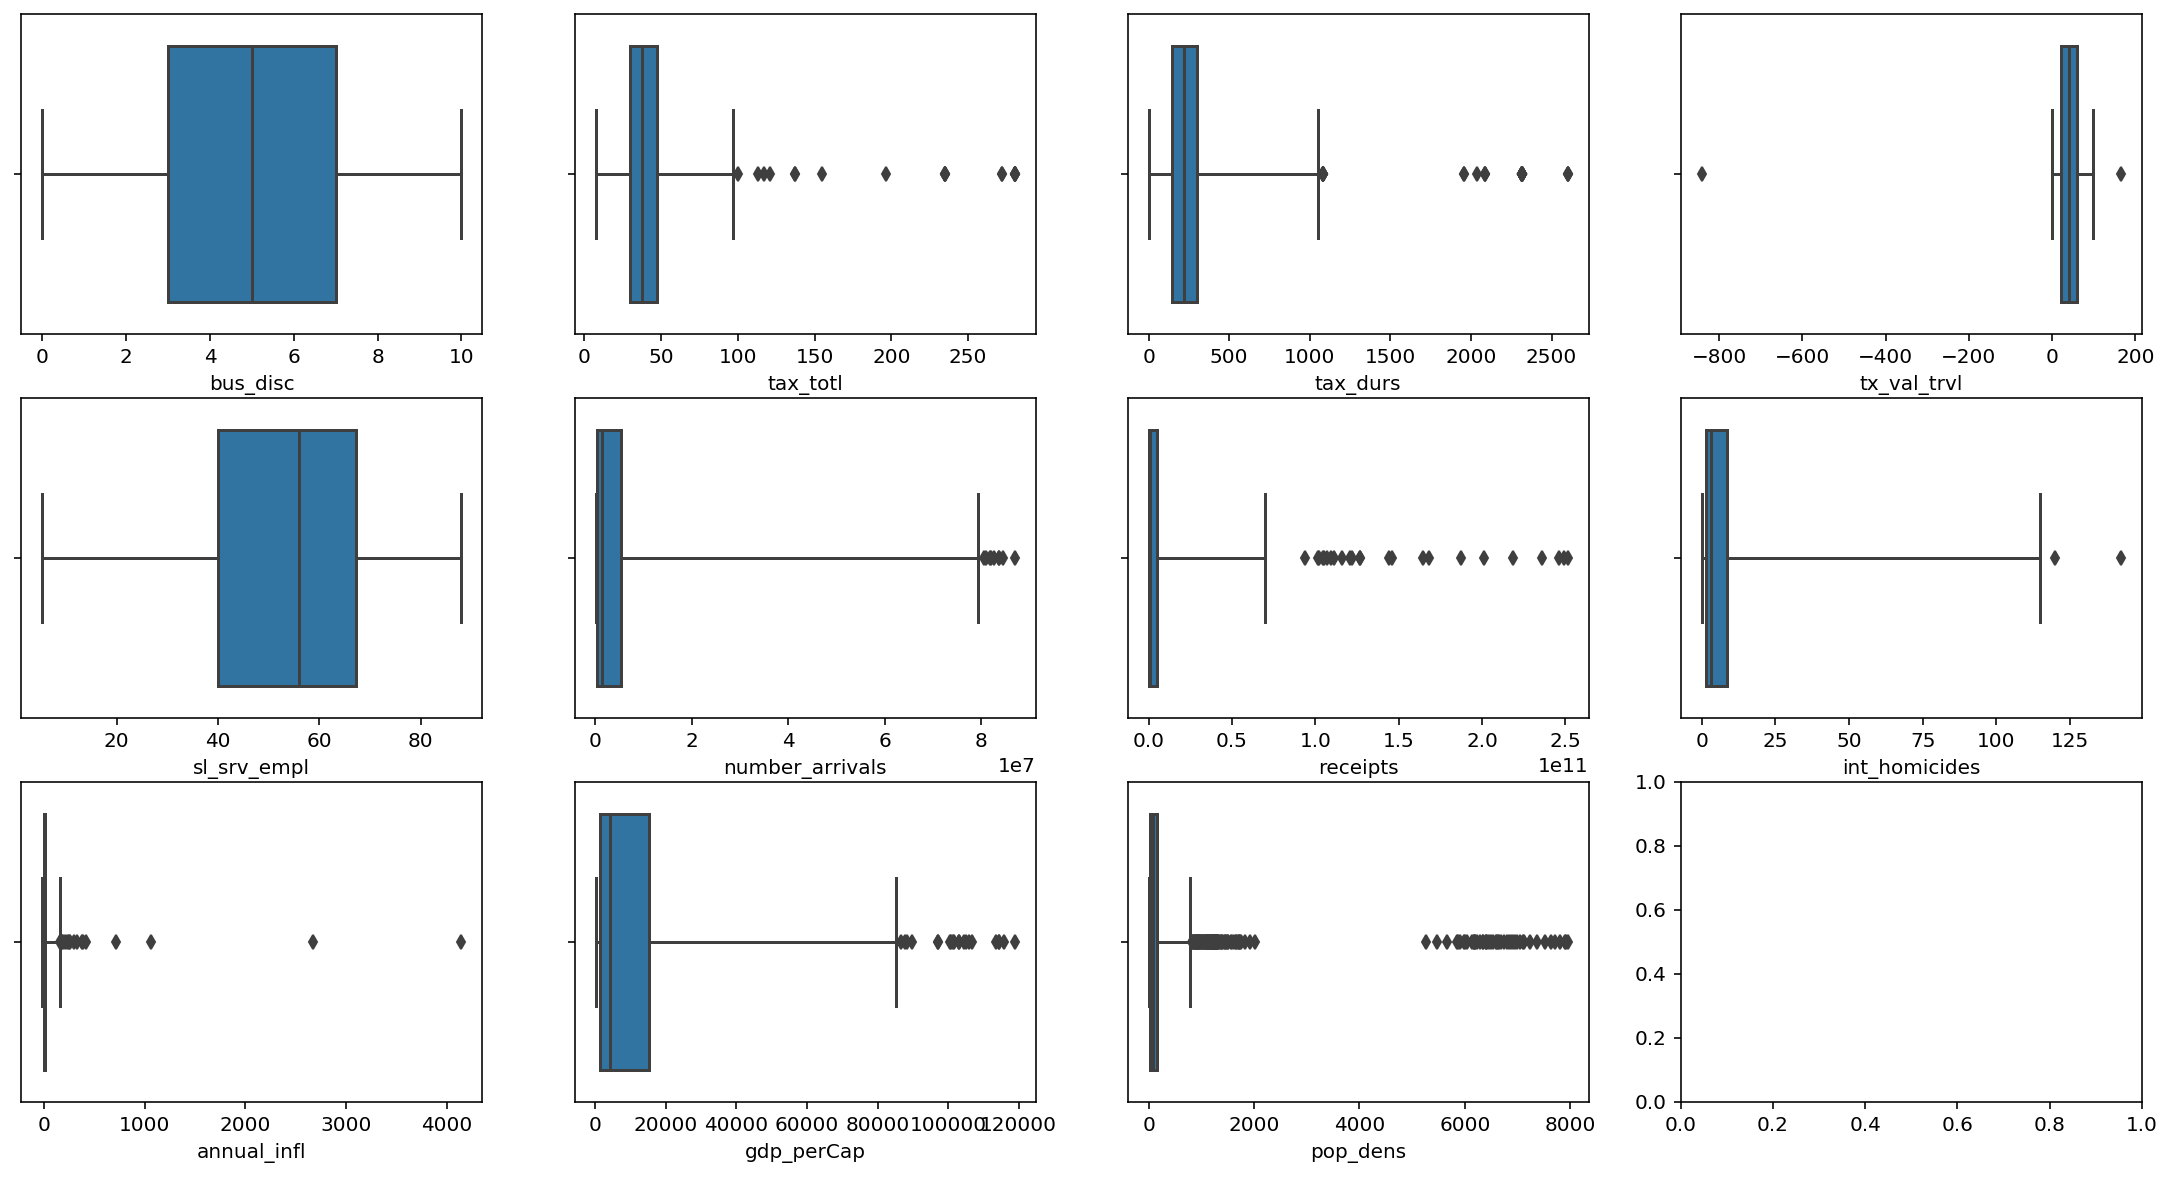

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(19, 10))
ax = sb.boxplot(final['bus_disc'], orient='h', whis=5,
    ax=axes[0,0])
ax = sb.boxplot(final['tax_totl'], orient='h', whis=3,
    ax=axes[0,1])
ax = sb.boxplot(final['tax_durs'], orient='h', whis=5,
    ax=axes[0,2])
ax = sb.boxplot(final['tx_val_trvl'], orient='h', whis=2,
    ax=axes[0,3])
ax = sb.boxplot(final['sl_srv_empl'], orient='h', whis=5 ,
    ax=axes[1,0])
ax = sb.boxplot(final['number_arrivals'], orient='h', whis=15, 
    ax=axes[1,1])
ax = sb.boxplot(final['receipts'], orient='h', whis=15, ax=axes[1,2]) 


ax = sb.boxplot(final['int_homicides'], orient='h', whis=15,ax=axes[1,3])

ax = sb.boxplot(final['annual_infl'], orient='h', whis=25,ax=axes[2,0])


ax = sb.boxplot(final['gdp_perCap'], orient='h', whis=5, 
    ax=axes[2,1])
ax = sb.boxplot(final['pop_dens'], orient='h', whis=5, 
    ax=axes[2,2])

### 3.7 Treat the outliers
Treating outliers is not a standard or straigh-forward procedure, and the complexity of this topic exceeds the scope of this project.
Nevertheless, it is not possible to just ignore them, so it was considered important to do some analysis of outlier presence in order to take basic action.
After noting that many variables had high percentage of outliers when resorting to the IQR Score, and considering once again the complexity intended for this project, outliers where identified through bloxplot analysis and knowledge of the business context, following this assumptions:
- tax_totl, as it is not intended that the amount of taxes and mandatory contributions payable by businesses after accounting for allowable deductions and exemption as a share of commercial profits exceeds 100% or is a negative value
- tx_val_trvl, as it is not intended that the percentage of commercial service exports that are related to travel services exceeds 100% or is a negative value
- sl_srv_empl must range from 0 to 100, as it is not intended that the employment in services relative to total employment exceeds 100% or is a negative value
- Basic notion for annual inflation, as it should not exceed 1000%
- There may be some countries that have very high intentional homicides when comparing with the majority

In [30]:
#tax_totl
tax_totl_outlier_countries = final.loc[final['tax_totl']>100, 'Country'].drop_duplicates()

#tx_val_trvl
tx_val_trvl_outlier_countries_more = final.loc[final['tx_val_trvl']>100, 'Country'].drop_duplicates()
tx_val_trvl_outlier_countries_less = final.loc[final['tx_val_trvl']<0, 'Country'].drop_duplicates()
tx_val_trvl_outlier_countries = tx_val_trvl_outlier_countries_more.append(tx_val_trvl_outlier_countries_less).drop_duplicates()

outlier_countries = tax_totl_outlier_countries.append(tx_val_trvl_outlier_countries).drop_duplicates()
outlier_countries

1065     BLR
1905     BDI
10245    SLE
10851    LKA
12885    YEM
98       ALB
Name: Country, dtype: object

Given that the identified countries have outliers that have no justification in the business context, indicating the high probability of being errors in the data, and (once again) considering that the complexity in treating outliers doesn't match the complexity and scope of this project, the countries will be removed from the dataframe of countries to be analysed.

In [31]:
removedCountriesFromAnalysis = removedCountriesFromAnalysis.append(outlier_countries).drop_duplicates()
final = final.loc[~final['Country'].isin(outlier_countries)]

## 4. Data Analysis/Processing
Processing data and analysing it is the main focus for obtaining insights about tourism data, which can be done through the different metodologies developed below, in order to reveal different aspects and perspectives about the data pre-processed before, allowing for the elaboration of conclusions that can generate knowledge.

### 4.1 Correlation Matrix
The correlation matrix allows to identify useful insights for further analysis, due to showing correlations between variables, which will allow to exclude some highly correlated variables in some analysis. Also, the correlations identified could induce some basic conclusions.

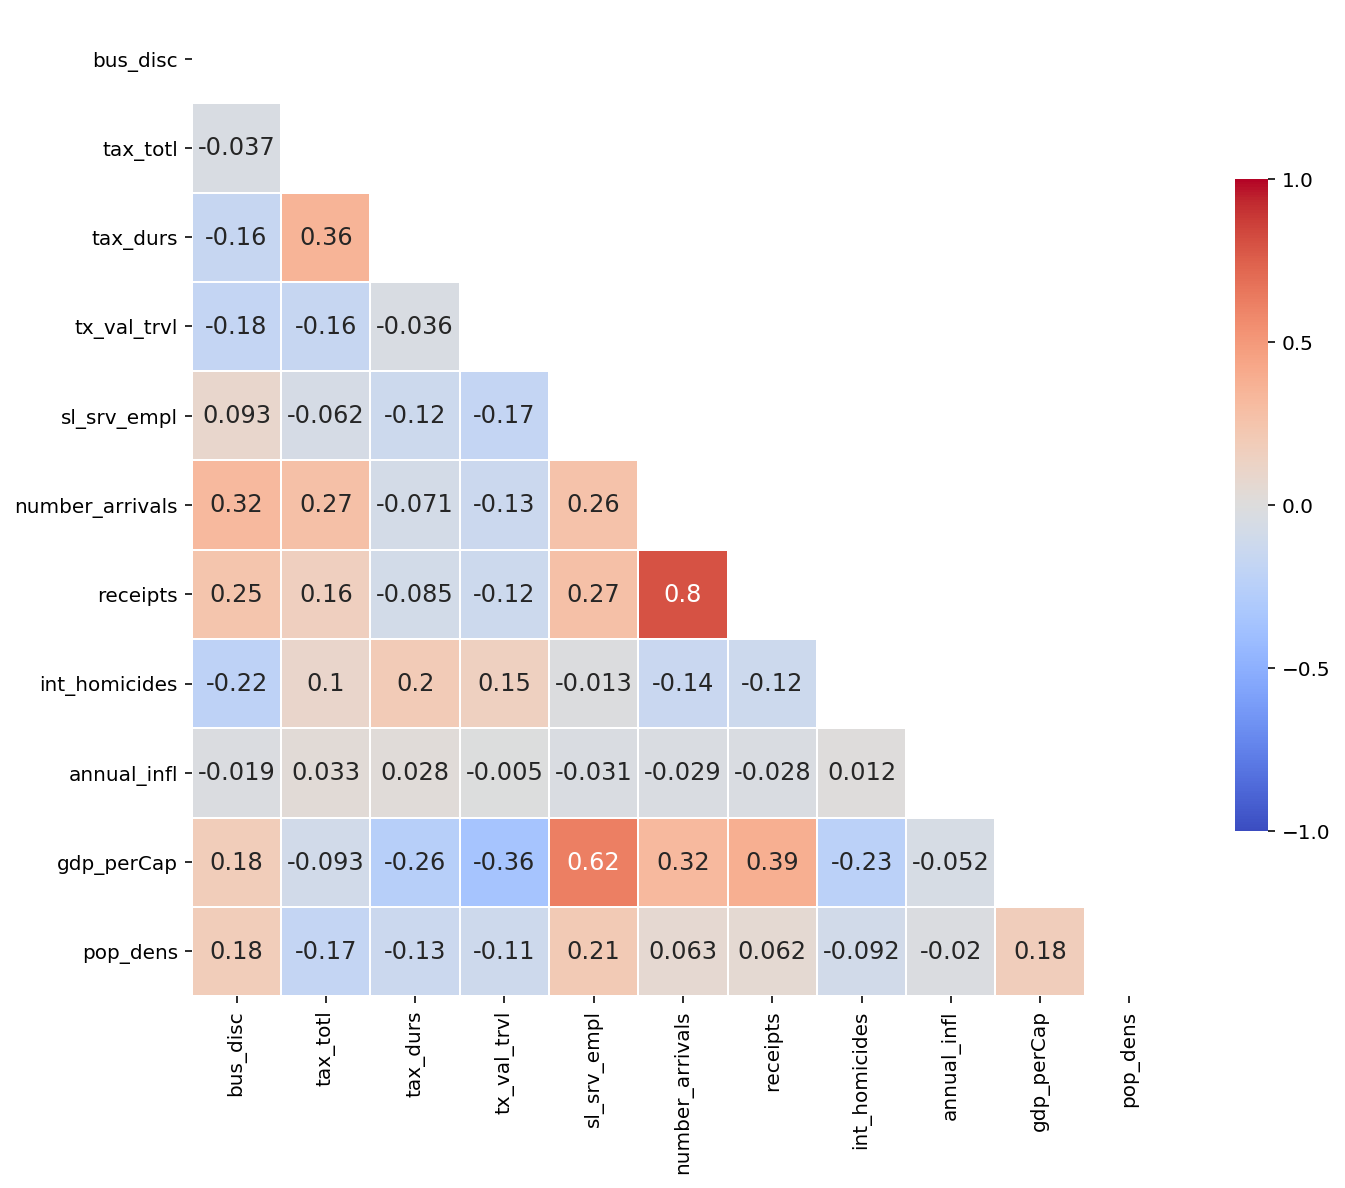

In [32]:
corr = final.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sb.heatmap(corr, mask = mask , square = True, linewidths = .5,
                      cmap = "coolwarm", cbar_kws = {'shrink': .4, "ticks" : [-1, -0.5, 0, 0.5, 1]}, 
                      vmin = -1, vmax = 1, 
                      annot = True, annot_kws = {"size": 12})

The obtained correlation matrix doesn't provide very useful insights by itself, besides a clear high correlation between receipts and number of arrivals.
In spite of that, analyzing the highest correlations (excluding receipts and number of arrivals), it is possible to draw some general conclusions about the correlations between some variables, including:
- The correlation of 0.32 between business disclosure and number of arrivals could indicate a slight tendency for more touristic activity in countries with higher business disclosure, the latter being a good measure for transparency of the market.
- If percentage of employment in services (sl_srv_empl) and GDP per capita (gdp_perCap) are considered measures for country development, than the correlation of 0.27 between sl_srv_empl and receipts and the correlation of 0.39 between gdp_perCap and receipts could indicate a very slight tendency for higher receipts in more developed countries, which can not be considered more than a hunch due to the low values of correlation.
Other high or slightly high correlations where not considered for this general and poorly based conclusions has they had no interest in the analysis in question.

### 4.2 Principal Components Analysis

#### 4.2.1 Remove variable "Employment in Services" (sl_srv_empl)
Considering the high correlation between this variable and GDP per capita, the variable was removed.
Even though receipts is also correlated with number of arrivals, we decided to keep both those variables, as we tought they might be useful for our analysis.

In [33]:
final = final.drop(['sl_srv_empl'], axis=1)

In [34]:
final_pca=final.set_index(['Country','Year']).drop(['name','region'], axis=1)

In [35]:
scaler = StandardScaler()
X_PCA_scaled = scaler.fit_transform(final_pca)

pca = PCA(n_components = final_pca.shape[1])
principalComponents = pca.fit_transform(X_PCA_scaled)

In [36]:
cov_mat = np.cov(X_PCA_scaled.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.44870611e-01  1.08916672e-01 -8.00352720e-02 -2.26530706e-01
   1.32214474e-01 -5.70718064e-01 -3.84493164e-02  6.19875935e-01
   2.71313368e-01 -9.45746813e-02]
 [-5.16158965e-02 -6.22712475e-01 -1.34891737e-01 -3.87701042e-01
  -6.16800734e-01  8.43395009e-02 -1.86832830e-01  1.31777653e-01
  -1.82614504e-02  2.99242483e-02]
 [ 1.89994244e-01 -5.00441077e-01  4.35218780e-02 -8.02807994e-02
   6.86373484e-01  2.50092877e-01 -2.97422520e-01  1.55463361e-01
   2.18900072e-01  1.04501165e-01]
 [ 2.63469601e-01  5.62562022e-02 -1.37021759e-02 -5.05412987e-01
   7.74922594e-02  2.65743432e-01  7.35234387e-01  1.49646615e-01
   1.24905585e-01 -1.28838007e-01]
 [-4.96939493e-01 -3.04828551e-01  7.19949328e-01  1.92976027e-01
  -1.61545825e-02  7.57751340e-02  3.01889552e-01 -4.81878887e-03
   6.60566568e-02 -5.51095933e-02]
 [-4.93224481e-01 -2.54969449e-01 -6.71466812e-01  2.63016854e-01
   1.58920294e-01  1.06767779e-01  3.27597483e-01 -1.56757764e-01
   3.28953424e-02 -

In [37]:
exp_var = pca.explained_variance_ratio_

In [38]:
ExpVar_table = pd.DataFrame(exp_var, columns=['Explained Variance'],
                            index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
ExpVar_table['Cumulative Explained Variance'] = exp_var.cumsum()
ExpVar_table

Explained Variance  Cumulative Explained Variance
PC1             0.251895                       0.251895
PC2             0.166330                       0.418225
PC3             0.111299                       0.529524
PC4             0.099552                       0.629076
PC5             0.092187                       0.721263
PC6             0.086948                       0.808211
PC7             0.071894                       0.880105
PC8             0.057274                       0.937379
PC9             0.044476                       0.981855
PC10            0.018145                       1.000000

#### 4.2.2 Test 5 Principal Components
After analysing the covariance matrix, we realised that there were 3 eigenvalues higher than 1 and other 2 really close to this value (0.996 and 0.922). Also, by looking at the explained variance table, it is possible to conclude that by keeping 5 principal components we can explain 72.1% of the total variance in the data.

In [39]:
pca1 = PCA(n_components = 5)
principalComponents1 = pca1.fit_transform(X_PCA_scaled)

In [40]:
scores = pd.DataFrame(principalComponents1, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=final[['Country', 'Year']])


In [41]:
loadings = pd.DataFrame(pca1.components_, columns=['bus_disc', 'tax_totl', 'tax_durs', 'tx_val_trvl', 'number_arrivals',
                                                   'receipts', 'int_homicides', 'annual_infl', 'gdp_perCap', 'pop_dens'],
                        index=['PC1','PC2','PC3','PC4','PC5'])
loadings

bus_disc  tax_totl  tax_durs  tx_val_trvl  number_arrivals  receipts  \
PC1  0.344871  0.051616 -0.189994    -0.263470         0.496939  0.493224   
PC2 -0.108917  0.622712  0.500441    -0.056256         0.304829  0.254969   
PC3  0.038449  0.186833  0.297423    -0.735234        -0.301890 -0.327597   
PC4  0.094575 -0.029924 -0.104501     0.128838         0.055110  0.045215   
PC5  0.271313 -0.018261  0.218900     0.124906         0.066057  0.032895   

     int_homicides  annual_infl  gdp_perCap  pop_dens  
PC1      -0.260371    -0.043250    0.426450  0.176476  
PC2       0.256773     0.057128   -0.159652 -0.306832  
PC3      -0.175824     0.174978    0.180992  0.204545  
PC4      -0.096452     0.967747   -0.098269 -0.045446  
PC5       0.449842     0.035589   -0.203065  0.782452

#### 4.2.3 Test 6 Principal Components
We decided to do this analysis, because 6 principal components allow us to explain 80.8% of the total variance in the data and we wanted to see if the 6th component would be relevant.

In [42]:
pca2 = PCA(n_components = 6)
principalComponents2 = pca2.fit_transform(X_PCA_scaled)

In [43]:
scores2 = pd.DataFrame(principalComponents2, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
                       index=final[['Country', 'Year']])

In [44]:
loadings2 = pd.DataFrame(pca2.components_, columns=['bus_disc', 'tax_totl', 'tax_durs', 'tx_val_trvl', 'number_arrivals',
                                                    'receipts', 'int_homicides', 'annual_infl', 'gdp_perCap', 'pop_dens'],
                        index=['PC1','PC2','PC3','PC4','PC5','PC6'])
loadings2

bus_disc  tax_totl  tax_durs  tx_val_trvl  number_arrivals  receipts  \
PC1  0.344871  0.051616 -0.189994    -0.263470         0.496939  0.493224   
PC2 -0.108917  0.622712  0.500441    -0.056256         0.304829  0.254969   
PC3  0.038449  0.186833  0.297423    -0.735234        -0.301890 -0.327597   
PC4  0.094575 -0.029924 -0.104501     0.128838         0.055110  0.045215   
PC5  0.271313 -0.018261  0.218900     0.124906         0.066057  0.032895   
PC6 -0.619876 -0.131778 -0.155463    -0.149647         0.004819  0.156758   

     int_homicides  annual_infl  gdp_perCap  pop_dens  
PC1      -0.260371    -0.043250    0.426450  0.176476  
PC2       0.256773     0.057128   -0.159652 -0.306832  
PC3      -0.175824     0.174978    0.180992  0.204545  
PC4      -0.096452     0.967747   -0.098269 -0.045446  
PC5       0.449842     0.035589   -0.203065  0.782452  
PC6       0.524638     0.156005    0.469426  0.085359

#### 4.2.4 Keeping 5 PCs
After comparing the results of the 5 and 6 principal components, we decided to keep 5, because we are able to explain a significant amount of the data variance and we considered that the 6th component is not that relevant.
Also, after analysing the loadings of the 5 principal components, we decided to name them “Revenue”, “Taxes”, “Lack of Travel Services”, “Inflation” and “Population Density”, respectively.

In [45]:
scores.columns = ['Revenue', 'Taxes', 'Lack of Travel Services', 'Inflation', 'Pop. Density']
scores.head()

Revenue     Taxes  Lack of Travel Services  Inflation  \
(DZA, 1995) -0.425567  1.827728                 1.962868  -0.093781   
(DZA, 1996) -0.412521  1.821617                 1.940517  -0.213403   
(DZA, 1997) -0.405112  1.813709                 1.915163  -0.352406   
(DZA, 1998) -0.402118  1.815168                 1.911446  -0.360369   
(DZA, 1999) -0.397993  1.815636                 1.905004  -0.384733   

             Pop. Density  
(DZA, 1995)     -0.570222  
(DZA, 1996)     -0.575666  
(DZA, 1997)     -0.580636  
(DZA, 1998)     -0.580157  
(DZA, 1999)     -0.580395

#### 4.2.5 Scores dataset
This dataset shows us the country data, applied to the chosen principal components, and their names and regions.

In [46]:
new_final = final.reset_index()

In [47]:
new_scores = scores.reset_index()
new_scores = new_scores.merge(new_final[['Year','Country','name','region']],
                              left_index=True, right_index=True).set_index('index')
new_scores

Revenue     Taxes  Lack of Travel Services  Inflation  \
index                                                                 
(DZA, 1995) -0.425567  1.827728                 1.962868  -0.093781   
(DZA, 1996) -0.412521  1.821617                 1.940517  -0.213403   
(DZA, 1997) -0.405112  1.813709                 1.915163  -0.352406   
(DZA, 1998) -0.402118  1.815168                 1.911446  -0.360369   
(DZA, 1999) -0.397993  1.815636                 1.905004  -0.384733   
(DZA, 2000) -0.386951  1.815847                 1.898982  -0.409896   
(DZA, 2001) -0.387960  1.819344                 1.905460  -0.367877   
(DZA, 2002) -0.381580  1.819539                 1.898038  -0.397829   
(DZA, 2003) -0.391374  1.846482                 1.886266  -0.377048   
(DZA, 2004) -0.360981  1.831503                 1.896738  -0.377896   
(DZA, 2005) -0.297437  2.005553                 1.952406  -0.408993   
(DZA, 2006) -0.304046  2.009826                 1.910120  -0.395774   
(DZA, 2007) -0.287636  1.892984                 1.911447  -0.382060   
(DZA, 2008) -0.279073  1.885912                 1.869161  -0.366457   
(DZA, 2009) -0.300763  1.824324                 1.853372  -0.349151   
(DZA, 2010) -0.248851  1.825087                 1.934097  -0.384691   
(DZA, 2011) -0.209339  1.827695                 1.950310  -0.385449   
(DZA, 2012) -0.213102  1.843424                 1.939654  -0.342061   
(DZA, 2013) -0.213039  1.835638                 1.904394  -0.396940   
(DZA, 2014) -0.187447  1.726503                 1.820415  -0.373451   
(DZA, 2015) -0.261757  1.718501                 1.772081  -0.338350   
(DZA, 2016) -0.148023  1.164663                 1.610185  -0.260812   
(DZA, 2017) -0.109346  1.181223                 1.658382  -0.278426   
(DZA, 2018) -0.163895  1.152097                 1.597270  -0.283442   
(AGO, 1995) -2.631950  2.178324                 4.130883  28.730178   
(AGO, 1996) -2.390410  3.316951                 9.645313  44.142779   
(AGO, 1997) -1.453168  0.626711                -0.619610   2.453163   
(AGO, 1998) -1.400877  0.556883                -0.838147   1.252338   
(AGO, 1999) -1.469811  0.646069                -0.564523   2.765431   
(AGO, 2000) -1.502095  0.693241                -0.413776   3.589105   
...               ...       ...                      ...        ...   
(ZMB, 2013) -1.186881 -1.204659                -1.249637   0.211663   
(ZMB, 2014) -1.203292 -1.245604                -1.340288   0.242592   
(ZMB, 2015) -1.228746 -1.081850                -1.321011   0.263874   
(ZMB, 2016) -1.248186 -1.073483                -1.339798   0.347081   
(ZMB, 2017) -1.202002 -1.262119                -1.382368   0.233986   
(ZMB, 2018) -1.249414 -1.279638                -1.442487   0.254701   
(ZWE, 1995) -0.516541 -0.379020                -0.335221   0.091636   
(ZWE, 1996) -0.503409 -0.374230                -0.340238   0.092032   
(ZWE, 1997) -0.515358 -0.381410                -0.333055   0.090775   
(ZWE, 1998) -0.489487 -0.361012                -0.353321   0.095213   
(ZWE, 1999) -0.480555 -0.356605                -0.357860   0.095870   
(ZWE, 2000) -0.495120 -0.364987                -0.349256   0.094428   
(ZWE, 2001) -0.526933 -0.318639                -0.382546   0.080175   
(ZWE, 2002) -0.548419 -0.310112                -0.387105   0.074727   
(ZWE, 2003) -0.493349 -0.351388                -0.360620   0.093661   
(ZWE, 2004) -0.501910 -0.364124                -0.349913   0.093713   
(ZWE, 2005) -0.500665 -0.534426                -0.400777   0.110036   
(ZWE, 2006) -0.415572 -0.554598                -0.390806   0.131703   
(ZWE, 2007) -0.420150  0.399336                -0.136394   0.057706   
(ZWE, 2008) -0.387076  1.109657                 0.095902   0.020509   
(ZWE, 2009) -0.520769 -0.158895                -0.333254   0.085354   
(ZWE, 2010) -0.286562 -0.225237                -0.060120   0.121257   
(ZWE, 2011) -0.422358 -0.306635                -0.236913   0.097384   
(ZWE, 2012) -0.398121 -0.418145       

#### 4.2.6 Visualize components
We decided to show some of our components in a visual way, in order to facilitate their comprehension and interpretation.

##### 4.2.6.1 Taxes

In [48]:
fig = px.choropleth(new_scores, locations="Country",color="Taxes", hover_name="name", animation_frame="Year",
             color_continuous_scale=px.colors.sequential.deep, scope = "world")
fig.show()

##### 4.2.6.2 Revenue

In [49]:
fig1 = px.strip(new_scores, x="Revenue", y="Year", orientation="h", color="region")
fig1.show()

##### 4.2.6.3 Inflation

In [50]:
fig2 = px.area(new_scores, x="Year", y="Inflation", color="region", line_group="name")
fig2.show()

### 4.3 Cluster Analysis

In [51]:
clust = new_scores.drop('Year',axis=1).groupby('Country').mean()

#### 4.3.1 Elbow Graph
In this step, we are going to plot an elbow graph to help us decide how many clusters we should use.

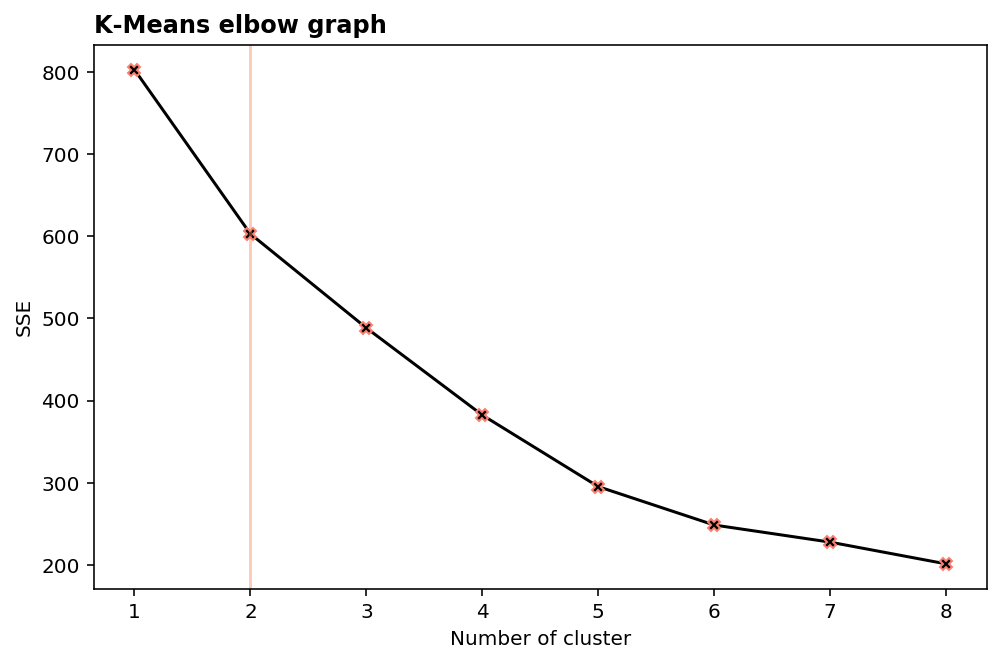

cluster_errors
num_clusters                
1                 803.168191
2                 603.103045
3                 488.501359
4                 382.324094
5                 295.108965
6                 248.338729
7                 227.479793
8                 200.971768

In [52]:
cluster_range = range(1,9)
cluster_errors = []
sse = {}
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, 
                random_state=0,
                n_init = 10,
                max_iter = 300).fit(clust)
    clust['clusters'] = kmeans.labels_
    
    sse[k] = kmeans.inertia_
    cluster_errors.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(list(sse.keys()), list(sse.values()),
         linewidth=1.5,
         linestyle='-',
         marker = 'X',
         markeredgecolor='salmon',
         color = 'black')
plt.title ('K-Means elbow graph', loc = 'left', fontweight = 'bold')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.axvline(x = 2, alpha = 0.4, color = 'coral', linestyle = '-')
plt.show()

clusters_df = pd.DataFrame({'cluster_errors':cluster_errors})
clusters_df.index += 1
clusters_df.index.name = 'num_clusters'
clusters_df

#### 4.3.2 Dendrogram
The elbow graph analysis tells us that we should retain 2 clusters. Nevertheless, we decided to complement it with examination of the dendrogram.

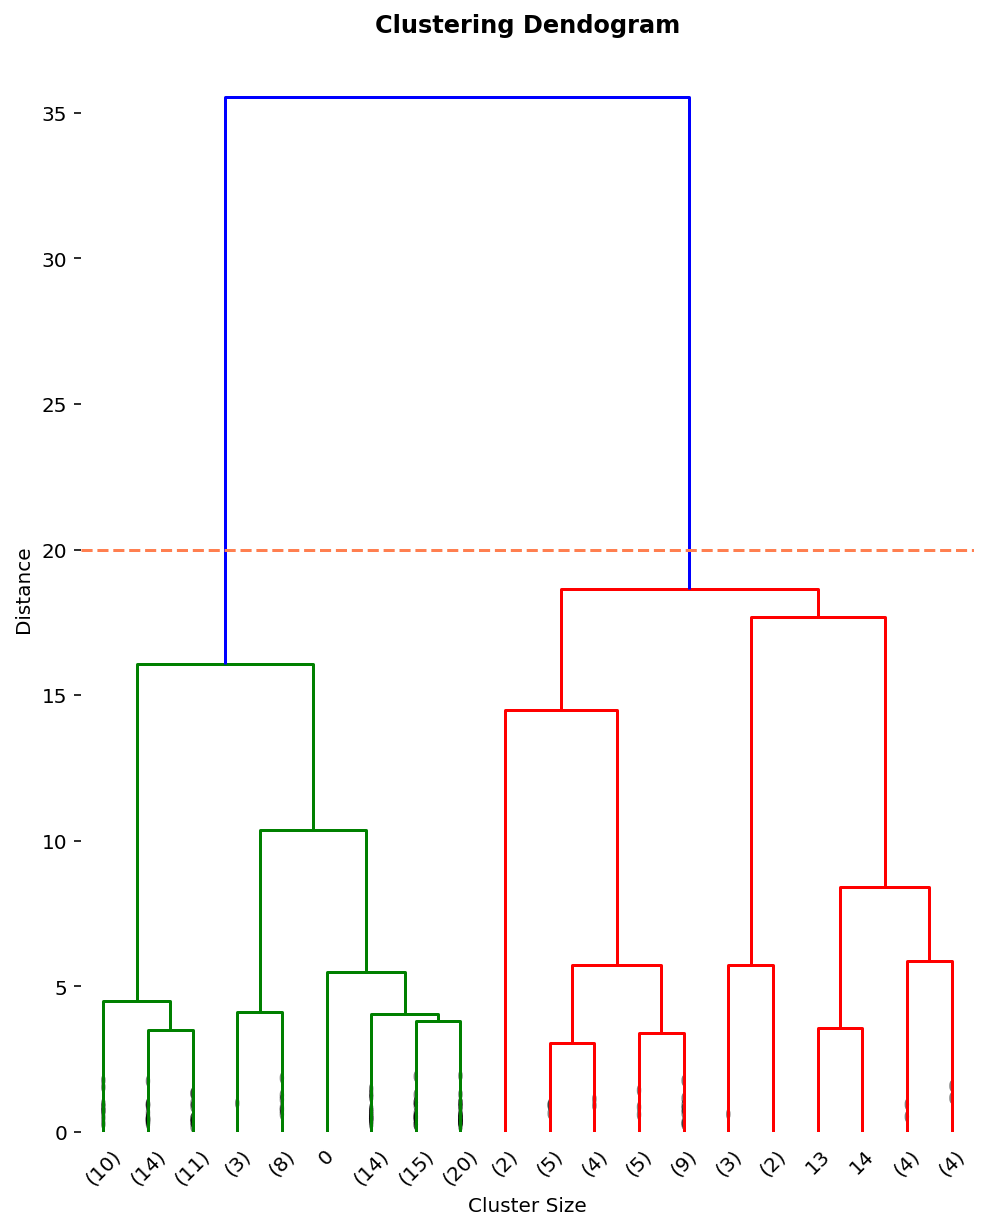

In [53]:
Z = linkage(clust, method = 'ward')
plt.subplots(figsize=(8, 10))
dendrogram(Z,
           truncate_mode='lastp',
           p=20,
           orientation = 'top',
           leaf_rotation=45.,
           leaf_font_size=10.,
           show_contracted=True,
           show_leaf_counts=True)
plt.title ('Clustering Dendogram', loc = 'center', fontweight = 'bold')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=20, color = 'coral', linestyle = '--')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()

#### 4.3.3 K-Means
Like the elbow graph, the dendrogram confirmed that we should use 3 clusters in our analysis. Now, we are going to use the k-means method to determine which countries will be in each cluster. 

In [54]:
cluster_range = range(1,3)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k,init='k-means++' ,
                random_state=0,
                n_init = 10,
                max_iter = 300).fit(clust)
    clust['clusters'] = kmeans.labels_

#### 4.3.4 Visual cluster analysis
Now, we are going to plot 3 graphs: the first one to determine each cluster frequency (how many countries are in each cluster); the second one to show the centroids of the cluster when plotted over the first two principal components; and the third one is a pairplot that shows the distribution of the 2 clusters in every principal component.


Absolute frequency of each cluster:

1    101
0     35
Name: clusters, dtype: int64

Relative frequency of each cluster:

1    74.26
0    25.74
Name: clusters, dtype: float64


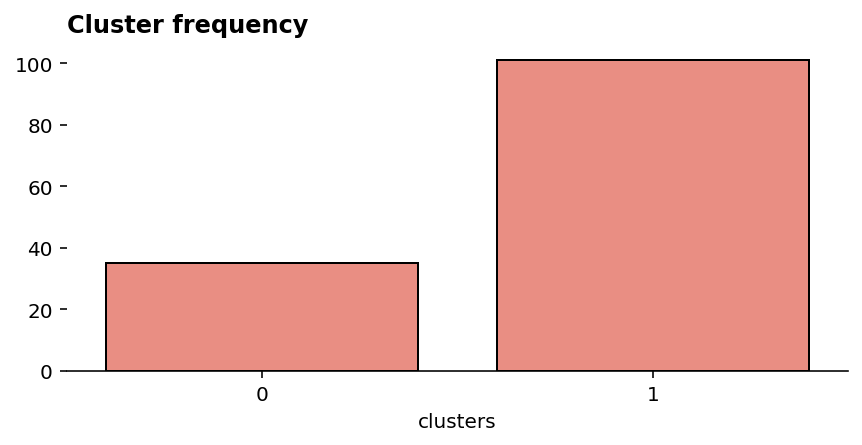

In [55]:
freq = clust
print('\nAbsolute frequency of each cluster:\n')
print(freq['clusters'].value_counts())
print('\nRelative frequency of each cluster:\n')
print(np.round(freq['clusters'].value_counts()/
               len(freq)*100,
               decimals=2))
plt.subplots(figsize=(7, 3))
plt.title ('Cluster frequency', loc='left', fontweight='bold')
sb.countplot(x=freq['clusters'], data=freq, color='salmon', edgecolor = 'black')
sb.despine(left='False') 
plt.ylabel("")
plt.show()

clust_0 is the cluster that includes the best countries to invest in, according to the analysis performed.

In [56]:
clust_0=clust[clust['clusters']==0]
clust_1=clust[clust['clusters']==1]

In [57]:
clust_array = np.array(clust.drop('clusters', axis=1))

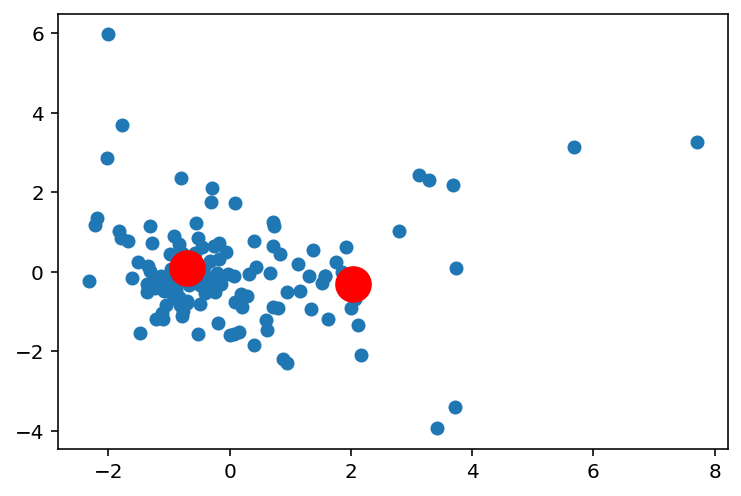

In [58]:
plt.scatter(clust_array[:,0], clust_array[:,1]) ##2D visualization of the clusters of the first 2 PCs
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

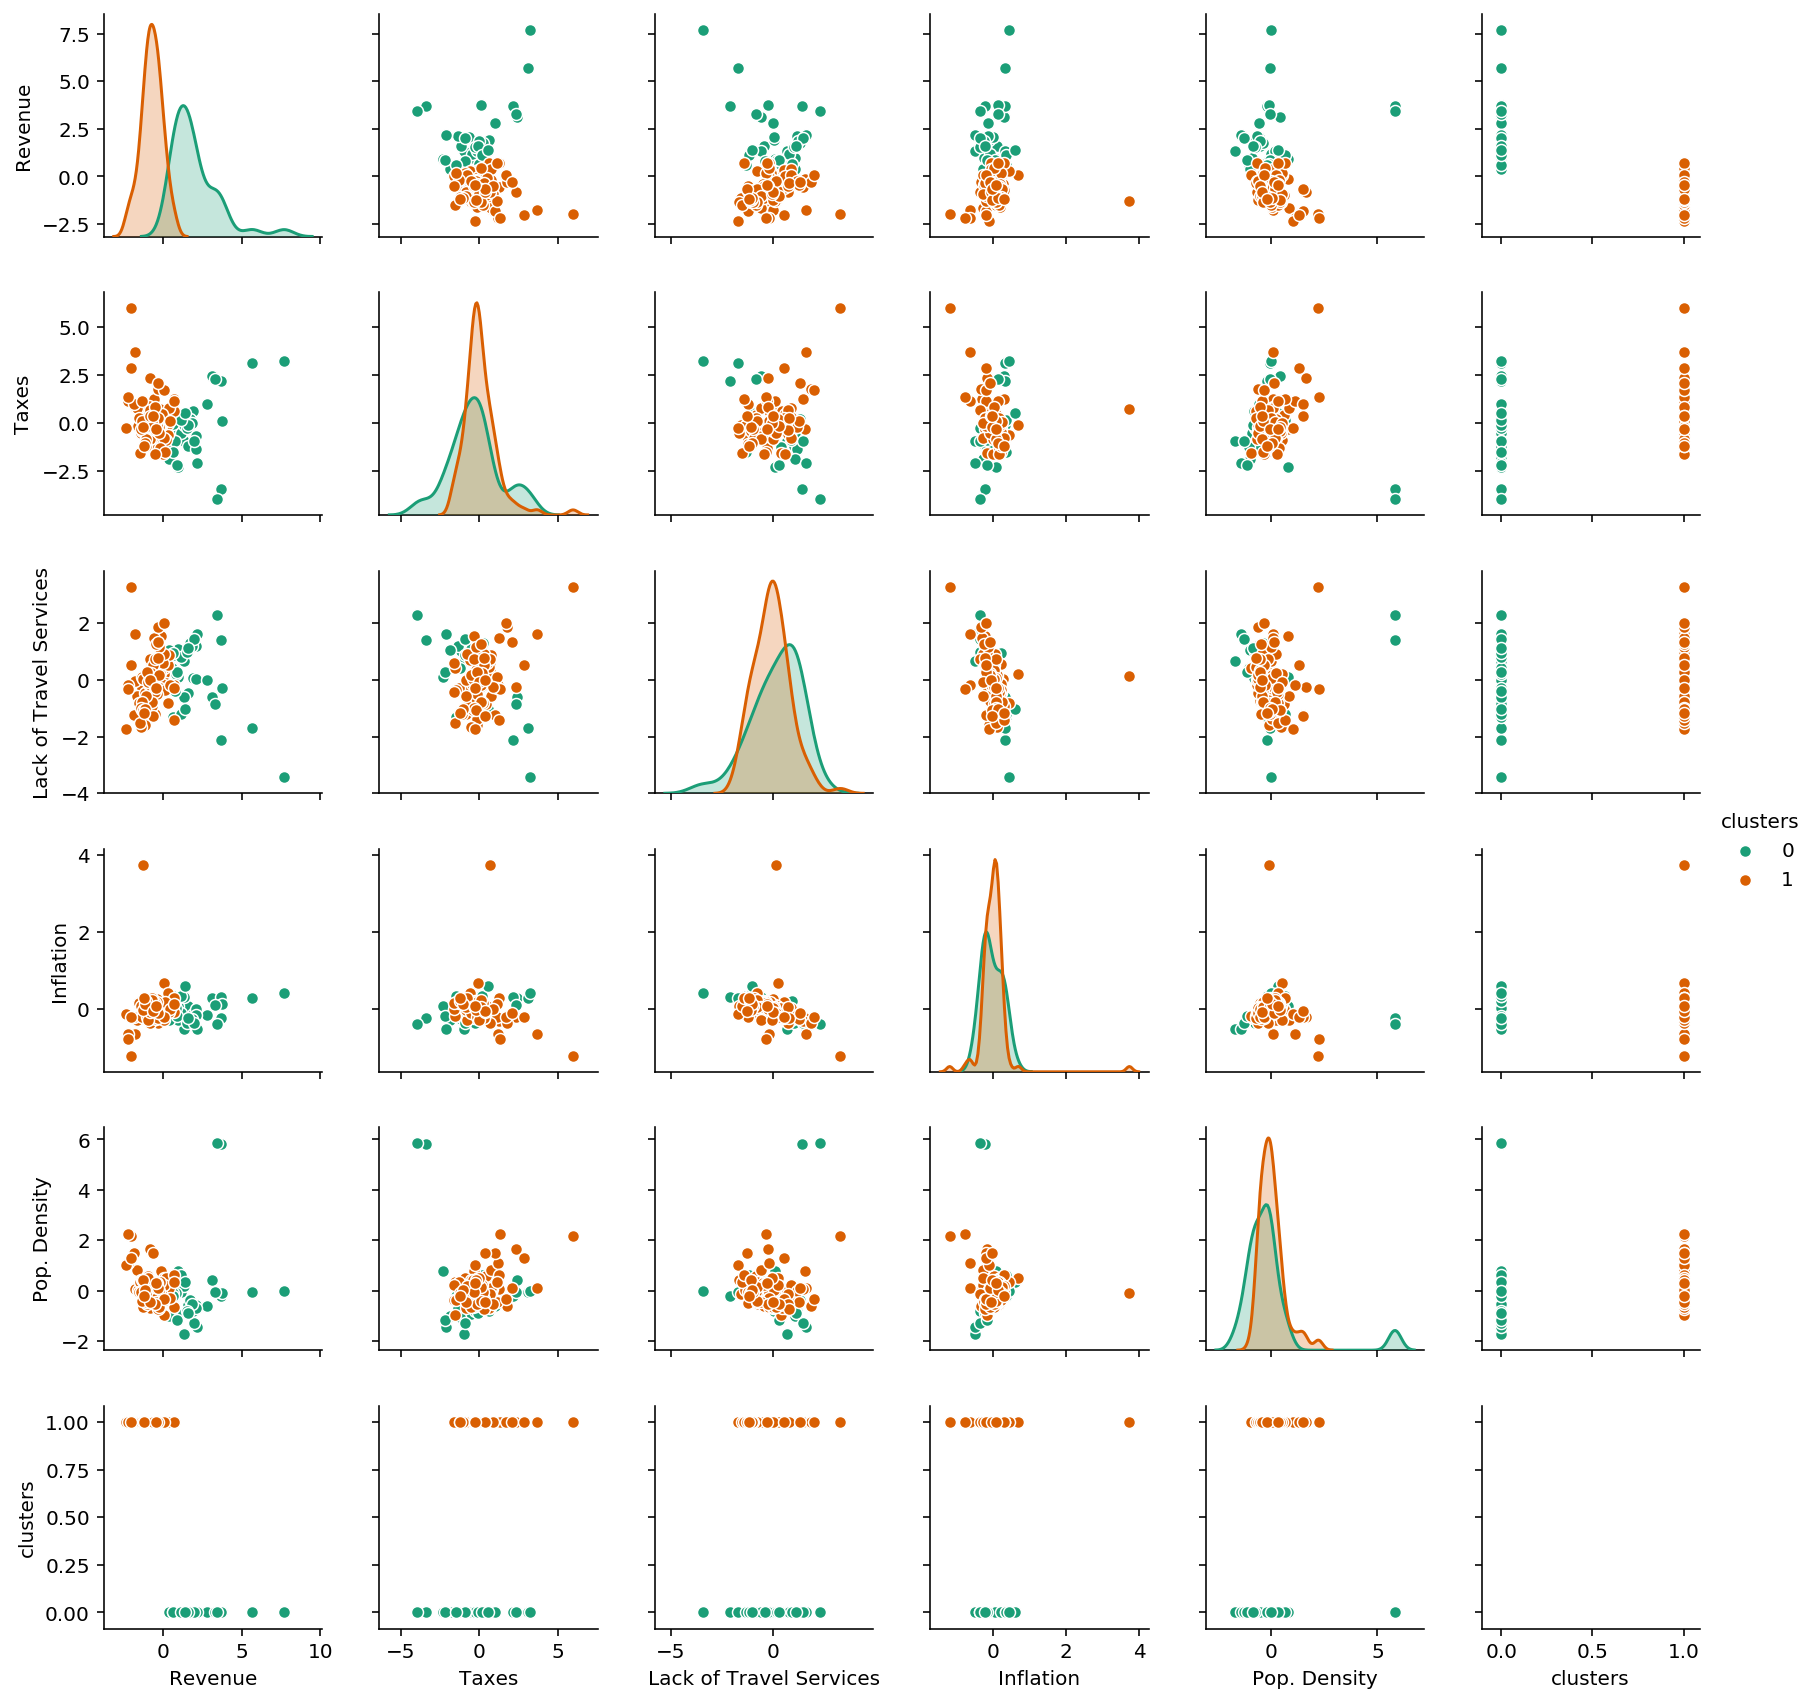

In [59]:
sb.pairplot(clust, hue='clusters', palette= 'Dark2', diag_kind='kde', height=2)

After this analysis, it is possible to conclude that the first principal component – Revenue – is the one the best separates the clusters and allows for a clearer interpretation. For this reason, and because it is this component that explains the biggest amount of variance, we consider Revenue to be the most important component of the five.

### 4.4 Narrowing down the analysis

#### 4.4.1 Evolution of top 10 countries by number of arrivals
The graph below allows to see the tendencies in number of arrivals by country, not considering the cluster analysis. This may help to understand that a decision based solely on number of arrivals, rather than all the analysis carried out, could result in picking different countries.

In [60]:
current_year = 2000
regions = final.groupby(['Year','Country', 'region'])['number_arrivals'].mean().reset_index(name='AVG_NA')
regions.Year=regions.Year.astype(int)
dff= regions

In [61]:
def draw_barchart(year):
    dff = regions[regions['Year'] == year].sort_values(by=['AVG_NA'], ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Country'], dff['AVG_NA'], color=[group_lk[x] for x in dff['Country']])
    #ax.barh(dff['Country'],
    #        dff['AVG_NA'])
    
    
    for i, (value, name) in enumerate(zip(round(dff['AVG_NA']), dff['Country'])):
        #ax.text(value, i, name+' ', ha='right')
        
        #ax.text(value, i, value, ha='left')
        ax.text(value, i-.25, name + "   ", size=10, color='#444444', ha='right', va='baseline')
        ax.text(value, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.2, year, transform=ax.transAxes, size=32, ha='right')
    


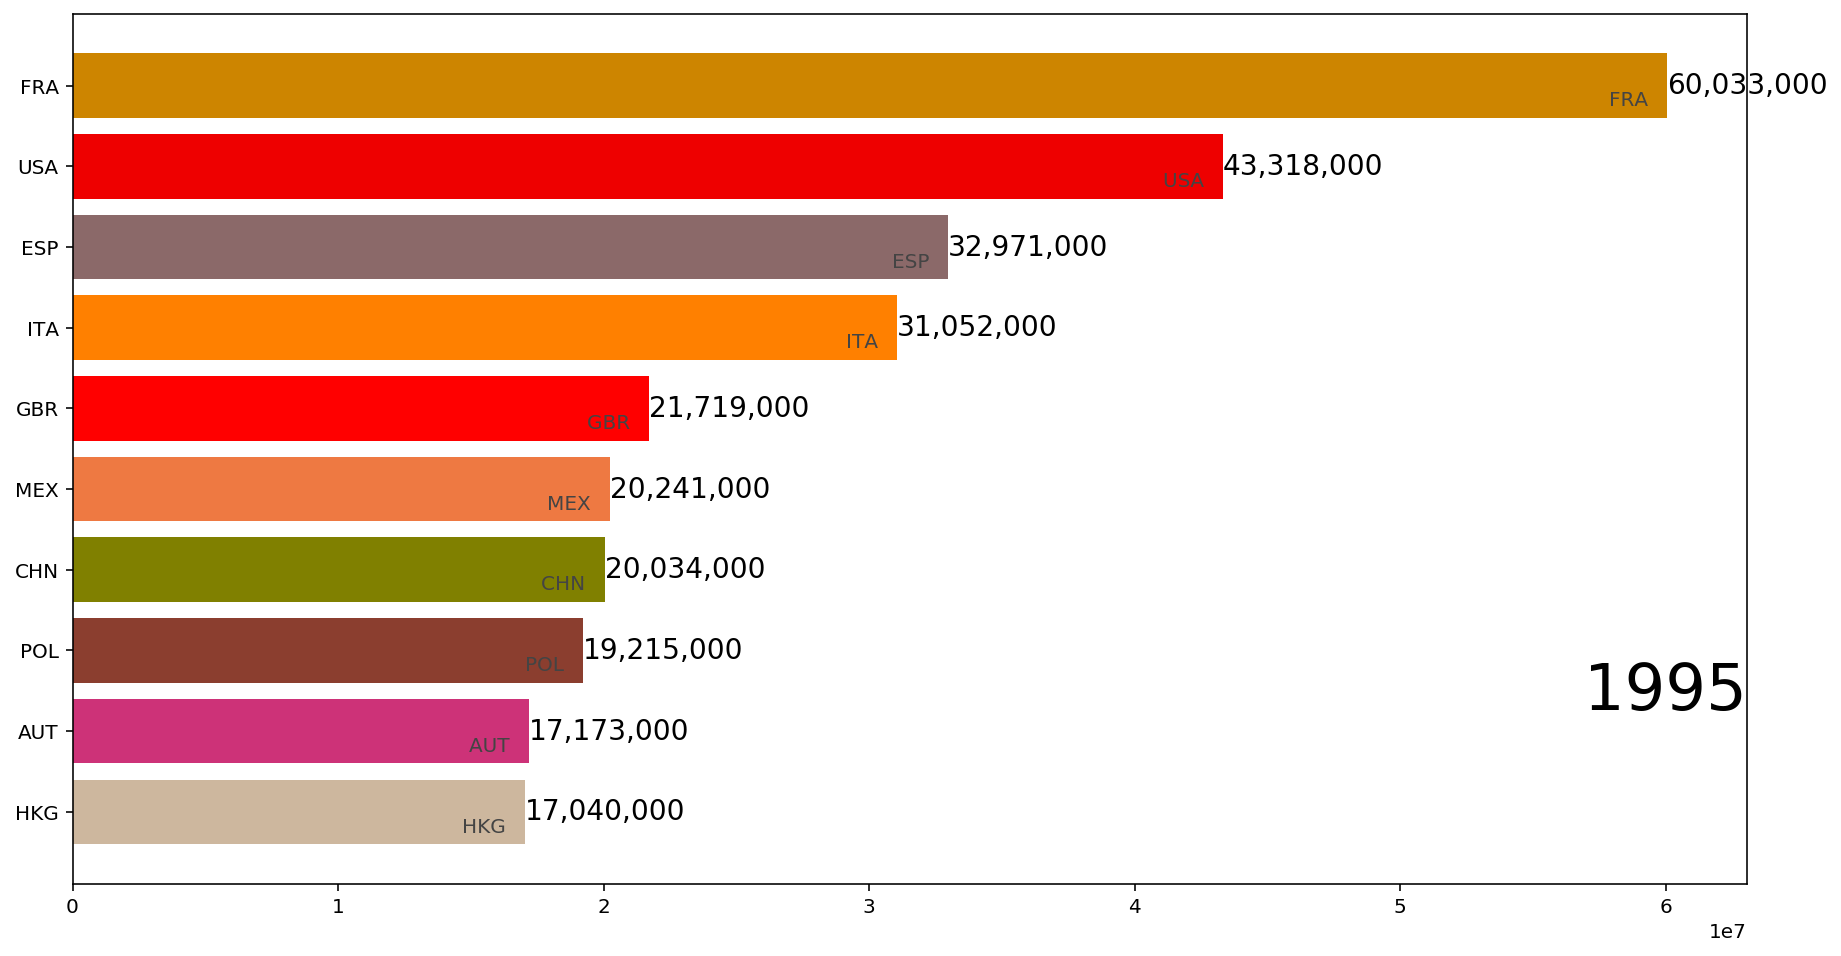

In [62]:

colors = dict(zip(
    ['Europe & Central Asia', 'Middle East & North Africa', 'Sub-Saharan Africa ', 'East Asia & Pacific',
     'Latin America & Caribbean ', 'South Asia','North America'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f','#ffffff']
))

cores = pd.read_excel("cores.xlsx", header=None)
countries_to_glk = final['Country'].drop_duplicates().to_frame() #concat coluna de cores

cores['tmp'] = np.arange(len(cores))
countries_to_glk['tmp'] = np.arange(len(countries_to_glk))

countries_start = pd.merge(countries_to_glk, cores, on=['tmp'])
countries_start = countries_start.drop('tmp', axis=1)

group_lk = countries_start.set_index('Country')[0].to_dict()

fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1995, 2018))
HTML(animator.to_jshtml()) 

#### 4.4.2 Top 10 countries by revenue from the Cluster Analysis
From the cluster analysis performed, it was identified a cluster that holds the best countries to invest in. From this cluster, the top 10 countries (ordered by revenue) are the ones considered in this step.

In [63]:
best_rev=clust_0
best_rev=best_rev.merge(country_names, on = 'Country')
best_rev=best_rev.sort_values(['Revenue'], ascending=[False])
best_rev=best_rev.iloc[:10]
paises=np.array(best_rev.Country)

#### 4.4.3 Bubble Chart
The bubble chart presented below helps to visualize the evolution of the countries presented in the previous step, in terms of:
- Country development evolution (observable in the size of each bubble, that is presented in function of GDP per capita)
- Revenue (observable in the y axes)
- Taxes (observale in the x axes)
This visualization allows to consider the two most important aspects in this analysis, while taking into account country development evolution, which could help in the process of decision making.

In [64]:
py.init_notebook_mode(connected=True)

In [65]:
top10=new_scores
top10=new_scores.merge(final, on=['Country','Year'])
top10=top10.loc[top10.Country.isin(paises)]
top10 = top10.groupby(['Year','Country'])['Taxes','Revenue','gdp_perCap', 'Lack of Travel Services'].mean().reset_index()
top10.Year=top10.Year.astype(int)
top10=top10.merge(country_names, on='Country')
years_final=top10.Year.tolist()
years_final = list(dict.fromkeys(years_final))

In [67]:
init_notebook_mode(connected=True)
years = years_final

# make list of continents
continents = []
for continent in top10['name']:
    if continent not in continents:
        continents.append(continent)
# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

figure['layout']['xaxis'] = {'range': [-8, 8], 'title': 'Taxes'}
figure['layout']['yaxis'] = {'range':[-1,2],'title': 'Revenue', 'type': 'log'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': '1995',
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
year = 1995
for continent in continents:
    dataset_by_year = top10[top10['Year'] == year]
    dataset_by_year_and_cont = dataset_by_year[dataset_by_year['name'] == continent]
    

    data_dict = {
        'x': list(dataset_by_year_and_cont['Taxes']),
        'y': list(dataset_by_year_and_cont['Revenue']),
        'mode': 'markers',
        'text': list(dataset_by_year_and_cont['region']),
        'marker': {
            'sizemode': 'area',
            'sizeref': 50,
            'size': list(dataset_by_year_and_cont['gdp_perCap'])
        },
        'name': continent
    }
    figure['data'].append(data_dict)
    
# make frames
for year in years:
    frame = {'data': [], 'name': str(year)}
    for continent in continents:
        dataset_by_year = top10[top10['Year'] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[dataset_by_year['name'] == continent]
        
        data_dict = {
            'x': list(dataset_by_year_and_cont['Taxes']),
            'y': list(dataset_by_year_and_cont['Revenue']),
            'mode': 'markers',
            'text': list(dataset_by_year_and_cont['region']),
            
            'marker': {
                'sizemode': 'area',
                'sizeref': 50,
                'size': list(dataset_by_year_and_cont['gdp_perCap'])
            },
            'name': continent
        }
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)


figure['layout']['sliders'] = [sliders_dict]

iplot(figure)

##### 4.4.3.1 Bubble Chart Conclusions
- **Singapore**: While revenue increases slightly, development tends to increase and taxes tend to decrease over time, being the country with lowest taxes from the ones in analysis
- **Hong Kong** appears to have some instability in taxes and minor changes in development, although increasing in revenue over time
- Despite the steep increase in revenue and reduction in taxes until 2007, **Luxembourg** appears to fluctuate around the same values, while slowly increasing country development
- **UK** appears to be the median country when considering the behaviour of revenue, taxes and country development, although registering a steeper increase in taxes when compared with the increase in revenue.
- **Germany** presents a stable development while increasing taxes in a quicker rate then the increase in revenue
- **Italy** presents a high fluctuation of taxes accompanied by a minor increase in revenue
- Tax fluctuation in **Spain** is one of the most notable, revealing some instability that doesn't seem to compensate the slow increase in revenue in the last years.
- From 2009 onwards, **China** appears to have a high fluctuation in taxes, while country development and revenue remain relatively constant.
- **France** has high and increasing taxes, with steeper growth rate then revenues and country development.
- **United States** surpassed France in regards to taxes in the final years of the analysis, with a very steep growth, accompanied by a considerable growth in revenue and a stable country development.

#### 4.4.4 Lack of travel services

In [68]:
fig = px.line(top10, x="Year", y="Lack of Travel Services", color="name", line_group="name", hover_name="name",
        line_shape="spline", render_mode="svg")
fig.show()

Lack of travel services appear to be most problematic in Singapore, with Luxembourg following closely.
In general, fluctuation is similar among countries, with highlight to USA, Spain and France, being the top 3 countries in regards with lack of travel services.

## 5. Conclusion

Considering the scope of this report and the complexity required, the analysis was performed based on variables that allow for a broad characterization of each country, in regards to more general economical and demographic terms, as well as to more tourism specific aspects.
Nevertheless, the analysis presented has a high level of simplicity and should be enriched with more variables and complemented with other business perspectives.
All the pre-processing required was carried out, including the basics of construction of a single dataset, manipulation of variables and removal of non-country observations, followed by an assessment of missing values, that implied the removal of certain countries and variables (and a second run to ensure a “missing values free dataset”, and ending with the assessment and removal of outliers.
The processing/analysis phase included several different methodologies, from analysing correlations to principal components, passing by cluster analysis. 
This analysis allowed to narrow the focus in countries that were part of the “best countries to invest in” cluster, from which were selected the top ten countries based on revenue, one of the principal components constructed. To understand the impact of the analysis, a race chart is presented, regarding only number of arrivals. A bubble chart with country development, revenue and taxes and a spaghetti chart with lack of travel services were used to draw out the final conclusions, allowing for visual interpretation of essential factors. 
Considering the visual analysis of the two charts, and the remaining analysis performed, it is possible to identify Singapore, USA and France as the top contenders for investment in the tourist sector.
Nonetheless, further analysis should be carried out to enrich this report, particularly for the case of USA, due to the particular nature of each state.

